#  ASA coursework

This notebook aims at analyzing the content of an shopping database that lists purchases made by  ∼ 3000 customers over a period of half year (from 2017/03/01 to 2017/08/31). Based on this analysis,in this notebook, we will try and explore the basic information about the dataset given. The dataset for this competition is a relational set of files describing customers' orders over time.

The dataset is anonymized and contains a sample of over 3 thousands users and 195547 orders.
.
For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order

The first steps is loading in and prepare for the data. 

Let us start by importing the necessary modules.


-------------------------



- 1. Preprocession of the data

>1.1 clean and load the data
>
>1.2 Create the new shopping time colums
>
>1.3 merge the data frame

- 2、	Data Exploration and Feature Engineering

>2.1 Data Exploration
>
>
>2.2 PCA
>
>2.3 NMF
>
>2.4 LDA
>
>2.5 Selecting our final Feature
>

- 3.  Clustering

>3.1 GMM
>
>3.2 K-means
>
>3.3 Cluster Visualisation
>
>3.4 Recovering  to original Segment Archetypes 
>
>3.5 Creating Profiles
>
>2.6 Selecting our final Feature
>


- 4 Creating Profiles and conclusions

>Total customers
>
>Clusters 1 to 5
>
>RFM
>


- 5. Conclusion

# 1、Preprocession of the data

## 1.1 clean and load the data



As a first step, I load all the modules that will be used in this notebook:

In [1]:
#-- import the pacakage of the environments

import pandas as pd
from sklearn.decomposition import PCA
from datetime import datetime
import datetime

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import psycopg2


Let us list out the files that are present in this competition


In [2]:
#-- load in the data

baskets_sample = pd.read_csv('./baskets_sample.csv')
category_spends_sample  = pd.read_csv('./category_spends_sample.csv')
customers_sample = pd.read_csv('./customers_sample.csv')
lineitems_sample = pd.read_csv('./lineitems_sample.csv')

Before we dive deep into the exploratory analysis, let us know a little more about the files given. To understand it better, let us first read all the files as dataframe objects and then look at the top few rows.

We notice that, for all the speding categoriesis object data type, and contins the "￡" in the data. So first thing we need to do is transfering them into float data type.

Also we found that some data type is wrong, so we just change it.


In [3]:
#-- the following code for data conversion

customers_sample[customers_sample.columns[4:]] = customers_sample[customers_sample.columns[4:]].replace('[\£,]', '', regex=True).astype(float)
category_spends_sample[category_spends_sample.columns[1:]] =category_spends_sample[category_spends_sample.columns[1:]].replace('[\£,]', '', regex=True).astype(float)
baskets_sample[baskets_sample.columns[3]] = baskets_sample[baskets_sample.columns[3:]].replace('[\£,]', '', regex=True).astype(float)
lineitems_sample[lineitems_sample.columns[-1]] = lineitems_sample[lineitems_sample.columns[4:]].replace('[\£,]', '', regex=True).astype(float)



In [4]:
#-- change the right type of time

baskets_sample['purchase_time'] = pd.to_datetime(baskets_sample['purchase_time'])
lineitems_sample['purchase_time'] = pd.to_datetime(lineitems_sample['purchase_time'])

Then, I load the data. Once done, I also give some basic informations on the content of the dataframe: the type of the various variables, the number of null values and their percentage with respect to the total number of entries:

In [5]:
customers_sample

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend
0,4749,220,260,1.181818,631.12,2.87
1,4757,248,333,1.342742,452.42,1.82
2,144,226,303,1.340708,261.16,1.16
3,572,285,346,1.214035,638.79,2.24
4,669,285,324,1.136842,561.42,1.97
...,...,...,...,...,...,...
2995,3583,598,705,1.178930,619.83,1.04
2996,6434,635,695,1.094488,877.16,1.38
2997,9778,1147,1466,1.278117,1754.97,1.53
2998,8639,262,275,1.049618,332.89,1.27


In [6]:
category_spends_sample

,customer_number,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,...,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items
0,11387,64.58,35.91,107.78,27.08,29.59,0.0,54.83,6.35,22.83,...,28.62,162.10,28.02,28.12,28.54,2.0,15.0,7.48,0.0,0.84
1,8171,16.89,37.24,28.84,33.43,66.40,0.0,22.06,12.09,2.34,...,26.44,0.00,8.42,2.65,3.76,0.0,0.0,9.99,0.0,0.00
2,1060,87.30,82.98,49.88,20.57,37.04,0.0,9.85,57.98,31.12,...,54.65,0.00,0.00,2.60,0.00,18.0,20.0,106.46,0.0,0.00
3,3728,84.05,186.56,175.50,119.84,111.08,0.0,13.05,25.54,124.42,...,0.95,127.70,0.00,0.00,0.00,4.0,0.0,0.00,0.0,4.50
4,14621,35.16,121.31,79.23,29.03,37.17,0.0,40.06,0.00,4.68,...,36.24,0.00,2.55,99.16,0.00,0.0,0.0,3.40,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,12541,64.52,73.84,89.36,135.31,61.99,0.0,0.00,61.02,56.62,...,58.78,36.57,0.00,0.00,3.36,0.0,0.0,0.00,0.0,2.53
2996,16081,5.91,18.08,18.32,23.69,16.12,0.0,5.39,15.96,0.67,...,0.00,50.54,0.00,7.73,9.74,30.0,0.0,0.00,0.0,1.61
2997,7094,116.54,106.08,42.31,35.92,43.59,0.0,13.68,1.78,21.44,...,21.51,0.00,7.65,4.10,2.59,0.0,0.0,0.00,0.0,6.79
2998,3457,3.68,13.44,21.96,10.10,12.51,0.0,4.75,1.04,4.33,...,4.66,0.00,0.00,8.27,1.65,0.0,0.0,1.98,0.0,0.00


In [7]:
lineitems_sample

,customer_number,purchase_time,product_id,category,quantity,spend
0,14577,2007-03-10 11:58:00,722653,GROCERY_FOOD,1,1.0
1,7210,2007-03-22 10:53:00,696136,GROCERY_HEALTH_PETS,1,1.0
2,3145,2007-03-26 11:17:00,139543,GROCERY_HEALTH_PETS,1,1.0
3,2649,2007-03-12 16:05:00,34890,BAKERY,1,1.0
4,859,2007-03-10 09:53:00,613984,BAKERY,1,1.0
...,...,...,...,...,...,...
1461310,11585,2007-08-21 11:59:00,730790,PRACTICAL_ITEMS,1,1.0
1461311,7329,2007-08-30 19:34:00,730790,PRACTICAL_ITEMS,1,1.0
1461312,1129,2007-08-30 16:51:00,730798,PRACTICAL_ITEMS,3,3.0
1461313,5060,2007-08-11 16:30:00,730798,PRACTICAL_ITEMS,2,2.0


In [8]:
baskets_sample

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1
...,...,...,...,...,...
195542,5107,2007-08-31 21:40:00,6,9.66,3
195543,1988,2007-08-31 21:45:00,12,14.98,6
195544,3028,2007-08-31 21:46:00,6,6.21,2
195545,7191,2007-08-31 21:46:00,7,6.30,3



After check, we didn't find the wrong data type. We also find some import info for data, like most of the custoer with 10 or more records of shopping.

-----------------------

## 1.2 Create the new shopping time habit colums from baskets_sample data



We want to transform the baskets_sample data into the feature of 3000 customers, which can  each shopping records feature not in other file.

Here we transform time into four time parts as following.


In [9]:
#-- See which is the start time 

baskets_sample.sort_values(by= 'purchase_time')

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1
...,...,...,...,...,...
195542,5107,2007-08-31 21:40:00,6,9.66,3
195543,1988,2007-08-31 21:45:00,12,14.98,6
195545,7191,2007-08-31 21:46:00,7,6.30,3
195544,3028,2007-08-31 21:46:00,6,6.21,2


In [10]:
baskets_sample['purchase_time'].max()

Timestamp('2007-08-31 21:55:00')

In [11]:
#-- Create the time interval and hour of each days

date1 = datetime.date(2007,9,1)
baskets_sample['recency'] = baskets_sample['purchase_time'].dt.date
baskets_sample['time_interval'] =date1-  baskets_sample['recency']

#-- data = data.drop(['purchase_time'],axis = 1)

baskets_sample['part_time'] = baskets_sample['purchase_time'].dt.hour

baskets_sample.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories,recency,time_interval,part_time
0,11911,2007-03-01 07:06:00,7,3.09,3,2007-03-01,184 days,7
1,4047,2007-03-01 07:13:00,9,7.99,5,2007-03-01,184 days,7
2,3571,2007-03-01 07:27:00,9,37.06,6,2007-03-01,184 days,7
3,4079,2007-03-01 07:34:00,11,11.91,5,2007-03-01,184 days,7
4,6063,2007-03-01 07:36:00,3,1.45,1,2007-03-01,184 days,7


In [12]:
df_max = pd.DataFrame(baskets_sample.groupby('customer_number').min())
df_max= df_max.reset_index('customer_number')

In [13]:
recency_df = df_max[['customer_number',"time_interval"]]


In [14]:
recency_df["time_interval"]  = recency_df["time_interval"]/ np.timedelta64(1, 'D')


C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
recency_df 

,customer_number,time_interval
0,14,2.0
1,45,2.0
2,52,3.0
3,61,4.0
4,63,8.0
...,...,...
2995,16295,1.0
2996,16301,5.0
2997,16303,12.0
2998,16306,11.0


#### time part: "morning" ,"afternoon" , "evening" , "night"

You can see teh details of coorelations of time to our new features: part_time

In [16]:
"""
"""
#-- time part: 

from sys import stdout


def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

baskets_sample['recency'] = baskets_sample['purchase_time'].dt.date
# If you want to use current hour:
# from datetime import datetime
# h = datetime.now().hour
# stdout.write('have a good {0}!\n'.format(get_part_of_day(h)))

for index, row in baskets_sample.iterrows():
    baskets_sample.ix[index,'part_time' ] = get_part_of_day(row['part_time'])


for h in range(0, 24):
    stdout.write('hour {0} is {1}\n'.format(h, get_part_of_day(h)))
    

C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


hour 0 is night
hour 1 is night
hour 2 is night
hour 3 is night
hour 4 is night
hour 5 is morning
hour 6 is morning
hour 7 is morning
hour 8 is morning
hour 9 is morning
hour 10 is morning
hour 11 is morning
hour 12 is afternoon
hour 13 is afternoon
hour 14 is afternoon
hour 15 is afternoon
hour 16 is afternoon
hour 17 is afternoon
hour 18 is evening
hour 19 is evening
hour 20 is evening
hour 21 is evening
hour 22 is evening
hour 23 is night


In [17]:
#-- only keep the useful columns

df1 = baskets_sample[['customer_number','part_time']]

In [18]:
#-- create the new datafram of 3000 records for joining with other data

df2 = pd.DataFrame(df1.groupby(['customer_number','part_time']).size().unstack(fill_value=0))
df2

part_time,afternoon,evening,morning,night
customer_number,,,,
14,48,4,4,0
45,27,1,5,0
52,38,0,21,0
61,33,1,3,0
63,37,2,9,0
...,...,...,...,...
16295,21,15,18,0
16301,11,27,4,0
16303,55,0,1,0


In [19]:
df2 = df2.reset_index('customer_number')

## 1.3 Create the new colums for categories from lineitems_sample

Here we want to create the new feature not only for total and average quantity,but for the categories of each customers.

But we would not use it as in our analysis, beacuse its high coorelatted with the total_quantity and average_quantity categories, and will count the info weights twice.

In [20]:
df3 = lineitems_sample[['customer_number','category']]

df4 = pd.DataFrame(df3.groupby(['customer_number','category']).size().unstack(fill_value=0))

df4 = df4.reset_index('customer_number')

df4

category,customer_number,BAKERY,CASHPOINT,CONFECTIONARY,DAIRY,DELI,DISCOUNT_BAKERY,DRINKS,FROZEN,FRUIT_VEG,...,GROCERY_HEALTH_PETS,LOTTERY,MEAT,NEWSPAPERS_MAGAZINES,PRACTICAL_ITEMS,PREPARED_MEALS,SEASONAL_GIFTING,SOFT_DRINKS,TOBACCO,WORLD_FOODS
0,14,28,0,26,107,0,1,46,13,16,...,17,0,46,2,0,7,3,13,0,18
1,45,22,0,111,153,1,0,0,5,27,...,20,0,28,41,0,28,0,25,0,9
2,52,5,1,10,9,30,0,0,1,53,...,8,1,4,3,0,2,6,18,0,54
3,61,40,0,57,48,16,0,4,8,55,...,21,1,59,10,2,8,1,14,0,14
4,63,38,0,69,41,17,0,0,11,21,...,20,2,2,3,0,11,0,3,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,16295,23,25,70,32,0,0,7,11,12,...,3,1,0,4,0,4,1,28,49,4
2996,16301,4,0,115,11,2,0,3,11,17,...,9,6,0,4,0,1,4,14,0,2
2997,16303,25,0,10,32,31,0,0,3,46,...,15,22,0,10,0,2,0,4,0,19
2998,16306,23,1,2,34,0,0,46,8,78,...,7,0,0,1,0,13,0,6,1,3


## 1.3 Create the new colums for categories from baskets_sample data

Here we create the columns of total_category  and average_category

In [21]:
#df5 = pd.DataFrame(baskets_sample[['customer_number','basket_categories']].groupby(['customer_number'])
df5 = baskets_sample[['customer_number','basket_categories']]
df6 = pd.DataFrame(df5.groupby(['customer_number']).sum())
df6 = df6.reset_index('customer_number')
df6 = df6.rename(columns={'basket_categories':'total_category'})

df7 = pd.DataFrame(df5.groupby(['customer_number']).mean())


df7 = df7.reset_index('customer_number')
df7  = df7.rename(columns={'basket_categories':'average_category'})
df6

,customer_number,total_category
0,14,250
1,45,211
2,52,174
3,61,223
4,63,176
...,...,...
2995,16295,200
2996,16301,115
2997,16303,217
2998,16306,131


In [22]:
df7

,customer_number,average_category
0,14,4.464286
1,45,6.393939
2,52,2.949153
3,61,6.027027
4,63,3.666667
...,...,...
2995,16295,3.703704
2996,16301,2.738095
2997,16303,3.875000
2998,16306,4.517241



### Here we successful convert the time into each person's  shoping habits

--------------




## 1.4 merge the data frame

In [23]:
#-- merge


data = pd.merge(customers_sample,category_spends_sample)
data = pd.merge(data,df2)
data = pd.merge(data,df6)
data = pd.merge(data,df7)
data = pd.merge(data,recency_df)

print(data.shape)
data.head(5)


(3000, 33)


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
0,4749,220,260,1.181818,631.12,2.87,14.45,35.61,24.01,9.99,...,0.00,0.00,2.20,30,49,13,0,177,1.923913,4.0
1,4757,248,333,1.342742,452.42,1.82,82.21,162.78,46.03,21.16,...,2.71,0.00,0.00,15,7,5,0,112,4.148148,4.0
2,144,226,303,1.340708,261.16,1.16,35.32,36.67,48.90,64.14,...,1.27,0.00,0.00,22,0,0,0,138,6.272727,4.0
3,572,285,346,1.214035,638.79,2.24,39.98,16.83,43.84,13.48,...,13.91,5.92,3.40,20,0,20,0,164,4.100000,2.0
4,669,285,324,1.136842,561.42,1.97,14.69,18.41,6.53,3.47,...,2.97,0.00,1.66,22,7,7,0,182,5.055556,2.0


In [24]:
data.to_csv('data.csv')

-------------------

# 2 、	Data Exploration and Feature Engineering- reduce the dimensions
Some features maybe strongle correlated with other categries, and if them use in the analysis, we will overweight this informations double count that information.

## 2.1 Data Exploration

In [25]:
data.dtypes

customer_number           int64
baskets                   int64
total_quantity            int64
average_quantity        float64
total_spend             float64
average_spend           float64
fruit_veg               float64
dairy                   float64
confectionary           float64
grocery_food            float64
grocery_health_pets     float64
bakery                  float64
newspapers_magazines    float64
prepared_meals          float64
soft_drinks             float64
frozen                  float64
meat                    float64
tobacco                 float64
drinks                  float64
deli                    float64
world_foods             float64
lottery                 float64
cashpoint               float64
seasonal_gifting        float64
discount_bakery         float64
practical_items         float64
afternoon                 int64
evening                   int64
morning                   int64
night                     int64
total_category            int64
average_

In [26]:
#-- print out some summary statistics as per normal
data.describe()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,487.105000,583.722000,1.204499,769.412937,1.682477,69.456163,71.302683,57.347793,60.007530,...,6.126987,1.814837,2.016220,33.871333,7.752333,23.558333,0.000333,275.851000,4.691742,9.121333
std,4686.259488,332.824524,405.006359,0.136323,552.769022,0.733105,70.499654,57.966265,55.959350,57.682533,...,13.104271,9.450367,4.322232,29.864886,14.222415,29.350816,0.018257,184.300706,1.679788,20.938531
min,14.000000,6.000000,6.000000,1.000000,7.280000,0.620000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.200000,1.000000
25%,4044.750000,257.000000,307.750000,1.119625,406.120000,1.260000,22.695000,31.390000,21.070000,21.087500,...,0.000000,0.000000,0.000000,13.000000,0.000000,4.000000,0.000000,150.000000,3.488809,1.000000
50%,8218.500000,417.000000,495.000000,1.175889,627.170000,1.490000,50.935000,56.875000,42.290000,44.030000,...,1.990000,0.000000,0.000000,27.000000,2.000000,13.000000,0.000000,233.000000,4.406829,3.000000
75%,12115.500000,628.250000,744.250000,1.250430,957.675000,1.860000,93.405000,95.327500,75.125000,80.922500,...,6.720000,0.000000,2.510000,46.000000,9.000000,30.000000,0.000000,359.000000,5.626542,7.000000
max,16316.000000,3119.000000,4949.000000,2.503686,6588.650000,10.840000,1262.970000,708.040000,614.370000,1017.070000,...,229.440000,173.060000,65.060000,301.000000,138.000000,204.000000,1.000000,1650.000000,14.083333,165.000000


In [27]:
data.isnull().any()

customer_number         False
baskets                 False
total_quantity          False
average_quantity        False
total_spend             False
average_spend           False
fruit_veg               False
dairy                   False
confectionary           False
grocery_food            False
grocery_health_pets     False
bakery                  False
newspapers_magazines    False
prepared_meals          False
soft_drinks             False
frozen                  False
meat                    False
tobacco                 False
drinks                  False
deli                    False
world_foods             False
lottery                 False
cashpoint               False
seasonal_gifting        False
discount_bakery         False
practical_items         False
afternoon               False
evening                 False
morning                 False
night                   False
total_category          False
average_category        False
time_interval           False
dtype: boo

To get a better understanding of how variables relate to each other, create a scatter matrix of each of the six product categories present in the data.

We concerned of the relationship of the total and average categories, which is all related to the number of cutomers

Using the corr() function that pandas provides to examine the Pearson correlations each product category has with each other:

In [28]:
#-- create and print a cross correlation of all the variables against each other
corr = data.corr()
print(corr)

                      customer_number   baskets  total_quantity  \
customer_number              1.000000 -0.108571       -0.103791   
baskets                     -0.108571  1.000000        0.983213   
total_quantity              -0.103791  0.983213        1.000000   
average_quantity             0.028944 -0.066042        0.076043   
total_spend                 -0.053265  0.861423        0.879082   
average_spend                0.133191 -0.205550       -0.165011   
fruit_veg                   -0.081879  0.655721        0.671735   
dairy                       -0.083583  0.763876        0.779378   
confectionary               -0.094811  0.730142        0.753551   
grocery_food                -0.044161  0.731297        0.754148   
grocery_health_pets         -0.073822  0.678844        0.689684   
bakery                            NaN       NaN             NaN   
newspapers_magazines        -0.098787  0.409756        0.386668   
prepared_meals              -0.115383  0.576757        0.59606

In [29]:
df0 = pd.DataFrame(corr)
df0.style.highlight_max()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
customer_number,1,-0.108571,-0.103791,0.0289435,-0.0532646,0.133191,-0.081879,-0.0835829,-0.0948113,-0.0441606,-0.0738223,nan,-0.0987868,-0.115383,-0.0530604,-0.10798,-0.0722484,0.076524,-0.0138663,0.00111973,-0.0448328,0.0382632,0.0152268,-0.0166233,-0.0165844,-0.0535673,-0.0479108,-0.0210235,-0.0355127,0.00547671,-0.0992652,-0.0897356,0.056554
baskets,-0.108571,1,0.983213,-0.0660416,0.861423,-0.20555,0.655721,0.763876,0.730142,0.731297,0.678844,nan,0.409756,0.576757,0.548287,0.635831,0.595758,0.223489,0.193643,0.35411,0.330721,0.169352,0.106799,0.26243,0.0814312,0.292292,0.479157,0.203378,0.377334,0.0141518,0.870284,0.325896,-0.260189
total_quantity,-0.103791,0.983213,1,0.0760427,0.879082,-0.165011,0.671735,0.779378,0.753551,0.754148,0.689684,nan,0.386668,0.596062,0.576032,0.645113,0.614495,0.23439,0.187061,0.335015,0.346334,0.150348,0.108554,0.278614,0.0827374,0.309686,0.453785,0.194331,0.362152,0.0101137,0.837355,0.326302,-0.251972
average_quantity,0.0289435,-0.0660416,0.0760427,1,0.0845826,0.306646,-0.0047159,0.0336443,0.10929,0.0630731,0.059928,nan,-0.0898004,0.0646091,0.136221,0.0460621,0.0378975,0.102768,-0.0076337,-0.0603102,0.0699176,-0.0466269,0.00862988,0.0727888,0.0355537,0.0573838,-0.10218,-0.0354238,-0.0641102,-0.016068,-0.124009,0.0111474,0.0477259
total_spend,-0.0532646,0.861423,0.879082,0.0845826,1,0.198001,0.583502,0.681432,0.631352,0.659923,0.646143,nan,0.341946,0.563085,0.548418,0.567701,0.607337,0.516385,0.364392,0.283388,0.270143,0.224897,0.315095,0.291898,0.0523628,0.309452,0.460457,0.265836,0.319265,0.0156909,0.774496,0.224443,-0.245395
average_spend,0.133191,-0.20555,-0.165011,0.306646,0.198001,1,-0.156211,-0.167606,-0.155882,-0.141494,-0.0789951,nan,-0.0975178,-0.0580925,-0.0144301,-0.116013,-0.0420655,0.448648,0.249919,-0.10192,-0.0879169,0.121498,0.394291,0.0139918,-0.0350508,-0.000159344,-0.0233441,0.0893971,-0.0773784,-0.000310826,-0.148755,-0.231137,0.0164789
fruit_veg,-0.081879,0.655721,0.671735,-0.0047159,0.583502,-0.156211,1,0.629616,0.465602,0.640928,0.490674,nan,0.136383,0.449565,0.259851,0.420811,0.550687,-0.0179921,0.108806,0.225524,0.206913,-0.0186427,-0.0490825,0.206127,0.0467583,0.27248,0.193725,-0.00656438,0.134534,0.0154953,0.417051,0.335048,-0.169856
dairy,-0.0835829,0.763876,0.779378,0.0336443,0.681432,-0.167606,0.629616,1,0.6101,0.651492,0.55753,nan,0.219894,0.509525,0.404795,0.531251,0.492942,0.0909439,0.0701434,0.224616,0.243247,0.0367697,0.0204227,0.234176,0.00057563,0.277045,0.308813,0.126726,0.233137,0.0269787,0.594252,0.290972,-0.20423
confectionary,-0.0948113,0.730142,0.753551,0.10929,0.631352,-0.155882,0.465602,0.6101,1,0.574594,0.577793,nan,0.211944,0.471222,0.537825,0.57433,0.440183,0.060835,0.0135058,0.206669,0.246258,0.0145591,0.0388619,0.277407,0.0578567,0.274943,0.24333,0.131327,0.15802,0.00669132,0.530344,0.327288,-0.156
grocery_food,-0.0441606,0.731297,0.754148,0.0630731,0.659923,-0.141494,0.640928,0.651492,0.574594,1,0.581256,nan,0.130919,0.481753,0.365991,0.569792,0.556404,0.0621821,0.0924204,0.21257,0.180413,0.0118106,-0.0155099,0.19596,0.0435308,0.260195,0.20235,0.0225789,0.171076,0.00693795,0.486723,0.389605,-0.16536


We can see that, some columns contains too many values of corr more than 0.7, like 'baskets','total_quantity','average_quantity','total_spend','average_spend','total_category','average_category'

so we can selet then in plot for viasulatation

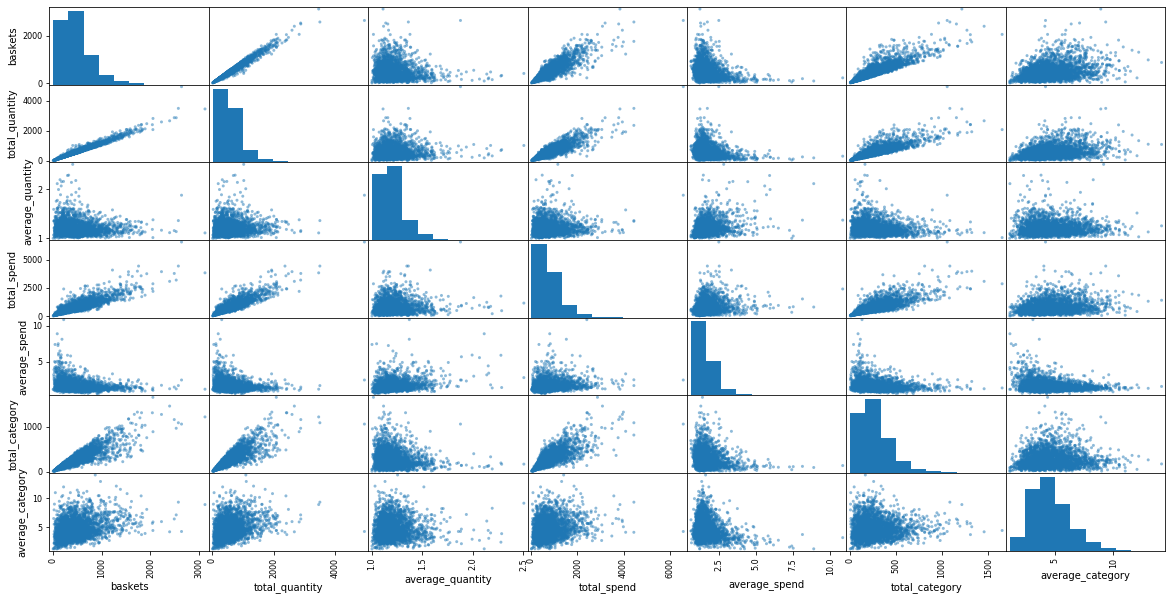

In [30]:
scatter = pd.plotting.scatter_matrix(data[['baskets','total_quantity','average_quantity','total_spend','average_spend','total_category','average_category']], figsize = (20,10))

In [31]:
corr = data[['baskets','total_quantity','average_quantity','total_spend','average_spend','total_category','average_category']].corr()

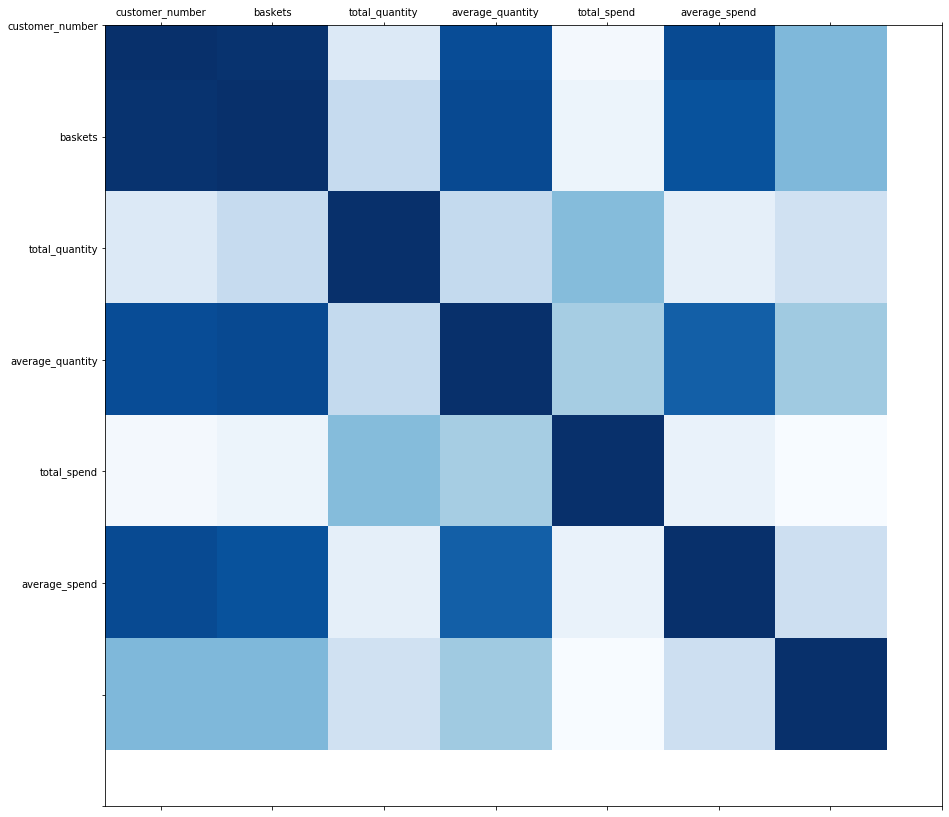

In [32]:
#-- Plot the results using a heatmap
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.matshow(corr, cmap="Blues")

#-- set the names of each column on the graph
plt.xticks(range(8), customers_sample.columns);
plt.yticks(range(8), customers_sample.columns);

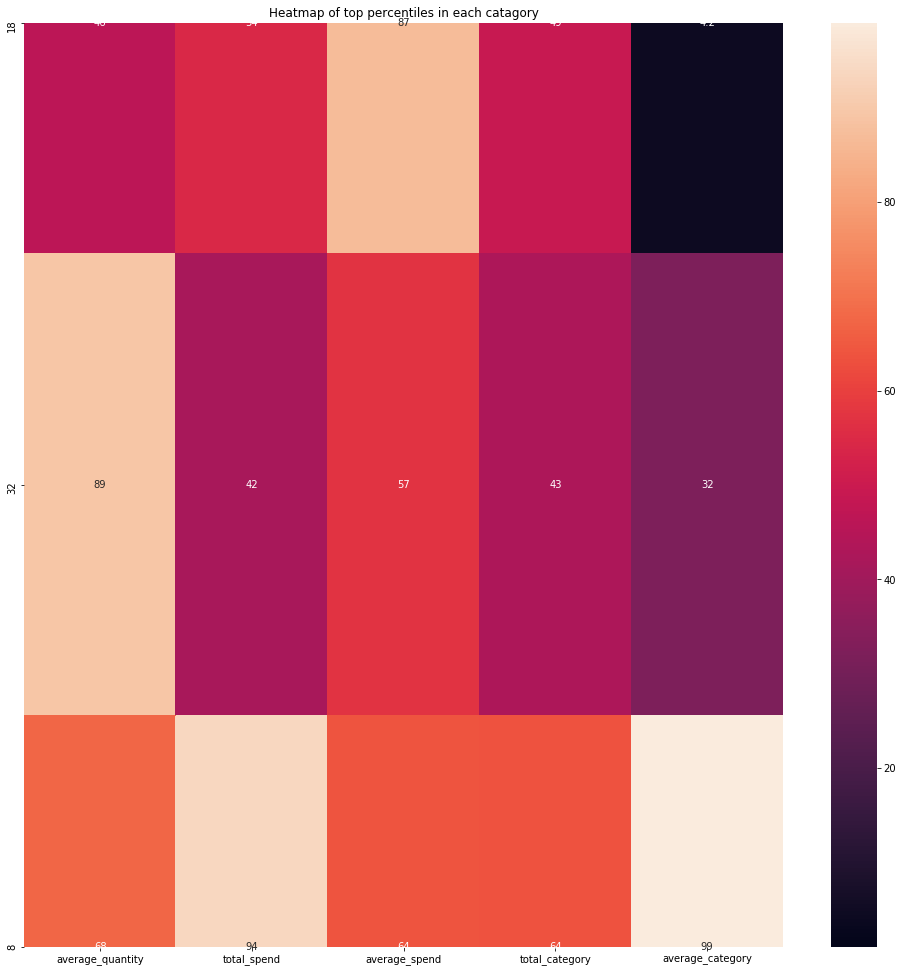

In [33]:
indices = [18,32,8]
# First, calculate the percentile ranks of the whole dataset.
percentiles = data[['average_quantity','total_spend','average_spend','total_category','average_category']].rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
plt.figure(figsize = (17,17))
plt.title("Heatmap of top percentiles in each catagory")
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

In [34]:
data.isna().sum() 

customer_number         0
baskets                 0
total_quantity          0
average_quantity        0
total_spend             0
average_spend           0
fruit_veg               0
dairy                   0
confectionary           0
grocery_food            0
grocery_health_pets     0
bakery                  0
newspapers_magazines    0
prepared_meals          0
soft_drinks             0
frozen                  0
meat                    0
tobacco                 0
drinks                  0
deli                    0
world_foods             0
lottery                 0
cashpoint               0
seasonal_gifting        0
discount_bakery         0
practical_items         0
afternoon               0
evening                 0
morning                 0
night                   0
total_category          0
average_category        0
time_interval           0
dtype: int64

OK, therefore, we end up with a dataframe filled at 100% for all variables! Finally, I check for duplicate entries and delete them:

## 2.3 PCA 

In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the customer data. 
Eliminate the correlations in our data  as they will skew results towards partitioning customers based on those correlated variables. To do this we could use a variety of techniques, first lets use PCA here

PCA wii report the explained variance ratio of each dimension and helpe eliminate correlated dimensions. It describe the quantities for explaination of variance by that dimension alone.Each component (dimension) from PCA can be considered a new "feature" of the space by composition of the original categories.

We can next interprete them in our analysis.

Let's run PCA first!

####  tests the null hypothesis that a sample comes from a normal distribution.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029969ACF248>,
      dtype=object)

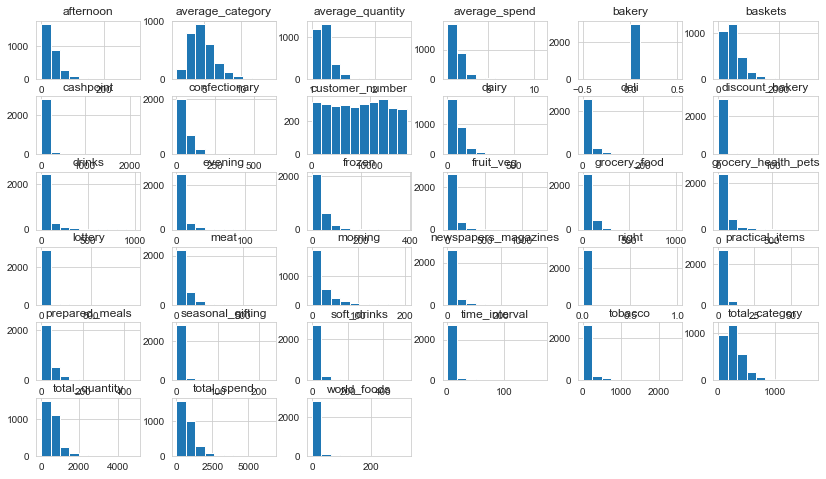

In [93]:
data.hist()

If data is not normally distributed, especially if the mean and median vary significantly (indicating a significant skew), it is most often appropriate to apply the natural logarithm.

In [35]:
import numpy as np
for k in data.columns:
    for i in data[k]:
        if i <= 0:
            data = data.replace(i,1e-4)



In [36]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Scale the data using the natural logarithm
logged_data = np.log(data)


#### outliers 
But we just see it, not apply to logged data.If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most often appropriate to apply the natural logarithm.

In [37]:
all_outliers = []
# For each feature find the data points with extreme high or low values
for feature in logged_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(logged_data[feature], 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(logged_data[feature], 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    outlier_points = logged_data[~((logged_data[feature] >= Q1 - step) & (logged_data[feature] <= Q3 + step))]
    display(outlier_points)
    
    for index in outlier_points.index.values:
        all_outliers.append(index)

#Find which data points are outliers on two or more features.

all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers_2_or_more = all_outliers[counts>1]
print ('Outliers on two or more features:', outliers_2_or_more )

# Select the indices for data points you wish to remove
outliers  = outliers_2_or_more

# Remove the outliers, if any were specified
good_data = logged_data.drop(logged_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'customer_number':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
2,4.969813,5.420535,5.713733,0.293198,5.565133,0.148420,3.564449,3.601959,3.889777,4.161068,...,0.239017,-9.210340,-9.210340,3.091042,-9.210340,-9.210340,-9.21034,4.927254,1.836211,1.386294
3,6.349139,5.652489,5.846439,0.193950,6.459576,0.806476,3.688379,2.823163,3.780547,2.601207,...,2.632608,1.778336,1.223775,2.995732,-9.210340,2.995732,-9.21034,5.099866,1.410987,0.693147
4,6.505784,5.652489,5.780744,0.128254,6.330469,0.678034,2.687167,2.912894,1.876407,1.244155,...,1.088562,-9.210340,0.506818,3.091042,1.945910,1.945910,-9.21034,5.204007,1.620488,0.693147
38,2.639057,5.942799,6.274762,0.331963,6.515779,0.570980,2.406945,5.150861,3.145014,4.026244,...,1.623341,0.223144,-9.210340,3.871201,1.386294,1.386294,-9.21034,5.521461,1.496109,0.693147
54,3.806662,6.329721,6.484635,0.154914,6.372859,0.039221,3.408173,4.956953,4.668521,4.423888,...,-9.210340,-9.210340,-9.210340,3.295837,0.000000,1.609438,-9.21034,5.351858,1.855351,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6.614726,6.028279,6.230481,0.202203,6.259849,0.231112,3.112181,3.729541,3.534270,2.909084,...,2.653242,-9.210340,-9.210340,3.610918,1.791759,3.496508,-9.21034,5.749393,1.418660,0.000000
626,6.632002,4.927254,5.081404,0.154151,5.370405,0.444686,2.463002,3.550766,2.662355,3.451574,...,-9.210340,-9.210340,1.918392,1.791759,-9.210340,0.000000,-9.21034,4.110874,2.164964,2.397895
630,6.626718,3.931826,4.007333,0.075508,4.300681,0.371564,1.637053,1.991976,1.305626,1.809927,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,-9.210340,-9.21034,2.397895,2.397895,5.003946
634,6.655440,4.174387,4.317488,0.143101,4.657383,0.482426,0.867100,2.113843,1.150572,1.913977,...,1.818077,-9.210340,0.828552,1.791759,-9.210340,-9.210340,-9.21034,3.637586,1.845827,1.945910


Data points considered outliers for the feature 'baskets':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
7,6.938284,4.094345,4.234107,0.139762,4.436278,0.343590,2.362739,2.004179,-0.139262,1.675226,...,2.141242,-9.210340,-9.210340,1.098612,-9.210340,1.945910,-9.21034,3.663562,1.360977,1.386294
154,9.167433,3.871201,4.007333,0.136132,4.537854,0.667829,2.232163,2.280339,-9.210340,1.633154,...,-9.210340,-9.210340,-9.210340,2.079442,-9.210340,-9.210340,-9.21034,3.401197,1.321756,4.174387
166,9.376109,4.025352,4.219508,0.194156,4.945563,0.920283,2.033398,2.141242,-0.174353,-9.210340,...,-9.210340,-0.116534,-9.210340,1.791759,1.098612,-9.210340,-9.21034,3.401197,1.203973,4.615121
189,9.171807,3.401197,3.555348,0.154151,4.195848,0.792993,1.902108,0.867100,-9.210340,2.020222,...,-9.210340,-9.210340,-9.210340,0.693147,0.693147,-9.210340,-9.21034,2.833213,1.446919,4.615121
218,9.173988,3.806662,3.806662,0.000000,5.810063,2.002830,1.280934,3.193353,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,3.178054,-9.210340,-9.210340,-9.21034,3.713572,0.535518,3.663562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,9.082848,3.433987,3.737670,0.303682,4.116595,0.683097,2.531313,-9.210340,1.778336,0.636577,...,-9.210340,-9.210340,-9.210340,0.693147,-9.210340,1.098612,-9.21034,2.772589,1.163151,4.430817
2747,9.297252,8.045268,8.149024,0.103756,8.254157,0.207014,5.849037,5.951840,6.087752,5.489351,...,4.150567,-9.210340,1.944481,4.007333,0.693147,4.369448,-9.21034,7.101676,2.189021,0.000000
2827,9.557329,3.465736,3.496508,0.030772,3.888345,0.425268,1.353255,0.982078,2.719320,2.286456,...,2.033398,-9.210340,-9.210340,-9.210340,-9.210340,0.000000,-9.21034,2.197225,2.197225,5.003946
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585


Data points considered outliers for the feature 'total_quantity':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
7,6.938284,4.094345,4.234107,0.139762,4.436278,0.343590,2.362739,2.004179,-0.139262,1.675226,...,2.141242,-9.210340,-9.21034,1.098612,-9.210340,1.945910,-9.21034,3.663562,1.360977,1.386294
149,9.381011,4.290459,4.317488,0.027029,4.774407,0.482426,1.589235,-0.072571,0.871293,-0.248461,...,-9.210340,-9.210340,-9.21034,2.833213,1.098612,0.000000,-9.21034,4.204693,1.160170,0.000000
154,9.167433,3.871201,4.007333,0.136132,4.537854,0.667829,2.232163,2.280339,-9.210340,1.633154,...,-9.210340,-9.210340,-9.21034,2.079442,-9.210340,-9.210340,-9.21034,3.401197,1.321756,4.174387
166,9.376109,4.025352,4.219508,0.194156,4.945563,0.920283,2.033398,2.141242,-0.174353,-9.210340,...,-9.210340,-0.116534,-9.21034,1.791759,1.098612,-9.210340,-9.21034,3.401197,1.203973,4.615121
189,9.171807,3.401197,3.555348,0.154151,4.195848,0.792993,1.902108,0.867100,-9.210340,2.020222,...,-9.210340,-9.210340,-9.21034,0.693147,0.693147,-9.210340,-9.21034,2.833213,1.446919,4.615121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,9.557329,3.465736,3.496508,0.030772,3.888345,0.425268,1.353255,0.982078,2.719320,2.286456,...,2.033398,-9.210340,-9.21034,-9.210340,-9.210340,0.000000,-9.21034,2.197225,2.197225,5.003946
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.21034,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585
2913,9.130214,4.248495,4.330733,0.082238,4.298509,0.048790,2.579459,-9.210340,2.349469,2.462150,...,-9.210340,0.086178,-9.21034,2.302585,1.386294,2.302585,-9.21034,3.871201,0.693147,0.693147
2933,9.645300,4.234107,4.317488,0.083382,4.386268,0.148420,2.511224,2.111425,2.589267,1.675226,...,-9.210340,-9.210340,-9.21034,1.609438,-9.210340,1.791759,-9.21034,3.806662,1.408767,4.043051


Data points considered outliers for the feature 'average_quantity':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
11,7.533159,5.645447,6.077642,0.432195,6.425388,0.779325,4.461646,5.177223,3.023834,4.493903,...,-9.210340,-9.21034,-9.210340,2.944439,0.693147,1.098612,-9.21034,4.744932,1.566878,2.197225
14,7.981050,6.317165,6.871091,0.553927,6.756374,0.438255,4.776515,4.547223,3.225653,4.570889,...,1.773256,-9.21034,2.142416,2.944439,-9.210340,3.401197,-9.21034,5.680173,1.788352,1.098612
23,9.375685,5.780744,6.606650,0.825907,6.161186,0.378436,2.532903,4.369828,3.501043,4.935840,...,1.625311,-9.21034,2.030776,3.737670,-9.210340,-9.210340,-9.21034,5.087596,1.349927,1.386294
49,9.647369,6.102559,6.541030,0.438471,6.134547,0.029559,3.448717,3.185939,4.868303,2.538447,...,-9.210340,-9.21034,-9.210340,3.688879,-9.210340,3.218876,-9.21034,5.438079,1.263692,0.000000
97,9.399058,5.991465,6.418365,0.426900,6.760241,0.770108,4.285378,3.061052,4.832226,4.520919,...,-9.210340,-9.21034,-9.210340,4.276666,1.945910,1.098612,-9.21034,5.620401,1.213682,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2862,8.528726,6.047372,6.508769,0.461397,7.403092,1.355835,2.931194,3.757939,2.692598,4.323603,...,1.220830,-9.21034,-9.210340,2.772589,0.000000,4.553877,-9.21034,5.929589,1.211090,0.000000
2917,8.844913,5.056246,5.690359,0.634114,6.798041,1.742219,0.067659,2.454447,1.778336,-1.139434,...,2.402430,-9.21034,-9.210340,3.555348,0.000000,3.367296,-9.21034,4.919981,0.745594,1.386294
2942,8.535426,6.023448,6.496775,0.473327,6.371133,0.350657,2.065596,4.207078,3.322154,4.516011,...,-9.210340,-9.21034,1.217876,3.583519,1.098612,2.995732,-9.21034,5.627621,1.550084,1.098612
2946,8.535230,6.293419,6.990257,0.696837,7.401860,1.108563,4.794550,4.611947,3.471034,5.490548,...,0.524729,-9.21034,3.014063,3.295837,2.079442,3.970292,-9.21034,5.981414,1.504077,0.693147


Data points considered outliers for the feature 'total_spend':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
7,6.938284,4.094345,4.234107,0.139762,4.436278,0.343590,2.362739,2.004179,-0.139262,1.675226,...,2.141242,-9.210340,-9.210340,1.098612,-9.210340,1.945910,-9.21034,3.663562,1.360977,1.386294
141,8.773539,7.228388,7.359468,0.131079,8.158167,0.928219,5.098524,5.456730,5.165015,4.842926,...,3.875359,-9.210340,0.239017,4.615121,4.927254,3.637586,-9.21034,6.861711,1.237694,0.000000
154,9.167433,3.871201,4.007333,0.136132,4.537854,0.667829,2.232163,2.280339,-9.210340,1.633154,...,-9.210340,-9.210340,-9.210340,2.079442,-9.210340,-9.210340,-9.21034,3.401197,1.321756,4.174387
189,9.171807,3.401197,3.555348,0.154151,4.195848,0.792993,1.902108,0.867100,-9.210340,2.020222,...,-9.210340,-9.210340,-9.210340,0.693147,0.693147,-9.210340,-9.21034,2.833213,1.446919,4.615121
280,9.409273,3.828641,3.931826,0.103184,4.250778,0.425268,1.363537,2.213754,1.759581,2.155245,...,-9.210340,-9.210340,-9.210340,0.693147,-9.210340,-9.210340,-9.21034,2.484907,1.791759,4.997212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585
2913,9.130214,4.248495,4.330733,0.082238,4.298509,0.048790,2.579459,-9.210340,2.349469,2.462150,...,-9.210340,0.086178,-9.210340,2.302585,1.386294,2.302585,-9.21034,3.871201,0.693147,0.693147
2933,9.645300,4.234107,4.317488,0.083382,4.386268,0.148420,2.511224,2.111425,2.589267,1.675226,...,-9.210340,-9.210340,-9.210340,1.609438,-9.210340,1.791759,-9.21034,3.806662,1.408767,4.043051
2970,9.645882,3.332205,3.401197,0.068993,3.408835,0.076961,0.717840,0.912283,2.347558,0.662688,...,0.688135,-9.210340,-9.210340,1.791759,-9.210340,-9.210340,-9.21034,2.995732,1.203973,2.197225


Data points considered outliers for the feature 'average_spend':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
6,6.833032,5.620401,5.683580,0.063179,6.979620,1.358409,3.192121,3.697096,2.401525,3.872450,...,-9.210340,-9.210340,1.280934,3.367296,2.079442,3.367296,-9.21034,5.209486,1.019831,1.945910
34,8.187021,6.126869,6.499787,0.372918,7.502909,1.376244,3.951436,3.041184,1.047319,0.765468,...,-0.174353,-9.210340,1.088562,4.709530,-9.210340,3.135494,-9.21034,6.021023,1.123184,0.000000
69,8.194782,6.109248,6.291569,0.182322,7.471238,1.360977,3.454106,4.561845,4.454580,3.970292,...,1.924249,-9.210340,-9.210340,3.526361,3.688879,0.693147,-9.21034,5.631212,1.300478,1.098612
158,5.225747,6.816736,6.872128,0.055392,6.344425,-0.478036,0.476234,4.554929,4.250921,4.219802,...,-9.210340,-9.210340,-9.210340,2.397895,1.386294,4.969813,-9.21034,6.533789,1.464885,0.000000
216,9.405743,4.836282,4.969813,0.133531,6.045147,1.208960,2.175887,0.947789,2.907993,2.479894,...,-9.210340,-9.210340,0.418710,3.828641,0.693147,0.693147,-9.21034,4.682131,0.770108,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,8.844913,5.056246,5.690359,0.634114,6.798041,1.742219,0.067659,2.454447,1.778336,-1.139434,...,2.402430,-9.210340,-9.210340,3.555348,0.000000,3.367296,-9.21034,4.919981,0.745594,1.386294
2937,8.846497,4.248495,4.499810,0.251314,5.674868,1.425515,0.322083,1.214913,0.418710,1.935860,...,1.381282,1.091923,-9.210340,2.772589,1.386294,1.386294,-9.21034,4.143135,0.965081,1.945910
2954,8.172164,4.919981,5.123964,0.203983,6.230107,1.311032,3.120160,3.758639,1.951608,2.663053,...,-9.210340,-9.210340,-9.210340,3.610918,2.302585,2.197225,-9.21034,4.795791,0.770439,1.609438
2966,9.564723,5.799093,5.948035,0.148942,7.307973,1.508512,3.678829,3.868489,3.696351,3.185112,...,2.543176,-9.210340,1.916923,3.465736,3.465736,2.484907,-9.21034,5.501258,1.170525,0.000000


Data points considered outliers for the feature 'fruit_veg':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
142,5.720312,4.330733,4.682131,0.351398,5.452925,1.121678,-9.210340,2.117460,1.451614,1.819699,...,-9.210340,-9.210340,-9.210340,2.944439,1.791759,1.609438,-9.21034,4.077537,0.676340,4.584967
158,5.225747,6.816736,6.872128,0.055392,6.344425,-0.478036,0.476234,4.554929,4.250921,4.219802,...,-9.210340,-9.210340,-9.210340,2.397895,1.386294,4.969813,-9.21034,6.533789,1.464885,0.000000
172,8.860215,6.066108,6.146329,0.080221,6.467838,0.398776,0.722706,3.810212,3.839667,3.642574,...,-9.210340,-9.210340,-9.210340,3.951244,2.197225,2.772589,-9.21034,5.843544,1.499739,1.945910
242,9.570041,5.537334,5.631212,0.093878,6.334380,0.797507,-0.072571,1.576915,0.712950,2.192770,...,-9.210340,-9.210340,-9.210340,4.418841,3.828641,3.295837,-9.21034,5.472271,0.422415,0.000000
340,5.986452,4.969813,5.135798,0.165985,6.213668,1.244155,-0.462035,3.368330,2.337952,2.174752,...,-9.210340,-9.210340,-9.210340,3.091042,0.000000,2.639057,-9.21034,4.718499,1.107581,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,8.844913,5.056246,5.690359,0.634114,6.798041,1.742219,0.067659,2.454447,1.778336,-1.139434,...,2.402430,-9.210340,-9.210340,3.555348,0.000000,3.367296,-9.21034,4.919981,0.745594,1.386294
2937,8.846497,4.248495,4.499810,0.251314,5.674868,1.425515,0.322083,1.214913,0.418710,1.935860,...,1.381282,1.091923,-9.210340,2.772589,1.386294,1.386294,-9.21034,4.143135,0.965081,1.945910
2957,9.188504,5.932245,6.003887,0.071642,6.573862,0.641854,-9.210340,3.220075,3.255786,1.050822,...,-9.210340,-9.210340,-0.174353,3.295837,4.262680,1.945910,-9.21034,5.755742,1.101782,0.000000
2970,9.645882,3.332205,3.401197,0.068993,3.408835,0.076961,0.717840,0.912283,2.347558,0.662688,...,0.688135,-9.210340,-9.210340,1.791759,-9.210340,-9.210340,-9.21034,2.995732,1.203973,2.197225


Data points considered outliers for the feature 'dairy':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
39,9.601166,5.476464,5.605802,0.129339,6.610077,1.134623,1.124930,0.322083,1.811562,2.254445,...,-9.210340,-9.210340,-9.210340,3.433987,2.197225,4.158883,-9.21034,5.429346,0.784955,2.079442
61,3.951244,5.327876,5.683580,0.355704,5.403488,0.076961,3.975749,1.646734,1.190888,0.076961,...,3.144152,-9.210340,-9.210340,3.637586,-9.210340,3.044522,-9.21034,5.159055,1.081518,1.098612
149,9.381011,4.290459,4.317488,0.027029,4.774407,0.482426,1.589235,-0.072571,0.871293,-0.248461,...,-9.210340,-9.210340,-9.210340,2.833213,1.098612,0.000000,-9.21034,4.204693,1.160170,0.000000
165,9.648531,4.644391,4.787492,0.143101,5.054780,0.412110,2.563410,0.824175,1.495149,0.746688,...,-9.210340,-9.210340,-9.210340,2.397895,0.000000,0.000000,-9.21034,3.970292,1.405343,3.218876
186,9.648724,5.351858,5.497168,0.145310,6.465554,1.115142,1.432701,1.678964,0.887891,0.792993,...,-9.210340,-9.210340,-9.210340,3.526361,1.609438,3.988984,-9.21034,5.313206,0.780606,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872,9.350798,4.762174,4.976734,0.214560,6.582717,1.821318,-9.210340,1.640937,3.054473,-9.210340,...,1.786747,-9.210340,0.751416,3.465736,2.890372,1.386294,-9.21034,4.624973,0.635989,0.000000
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585
2913,9.130214,4.248495,4.330733,0.082238,4.298509,0.048790,2.579459,-9.210340,2.349469,2.462150,...,-9.210340,0.086178,-9.210340,2.302585,1.386294,2.302585,-9.21034,3.871201,0.693147,0.693147
2937,8.846497,4.248495,4.499810,0.251314,5.674868,1.425515,0.322083,1.214913,0.418710,1.935860,...,1.381282,1.091923,-9.210340,2.772589,1.386294,1.386294,-9.21034,4.143135,0.965081,1.945910


Data points considered outliers for the feature 'confectionary':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
7,6.938284,4.094345,4.234107,0.139762,4.436278,0.343590,2.362739,2.004179,-0.139262,1.675226,...,2.141242,-9.210340,-9.210340,1.098612,-9.210340,1.945910,-9.21034,3.663562,1.360977,1.386294
34,8.187021,6.126869,6.499787,0.372918,7.502909,1.376244,3.951436,3.041184,1.047319,0.765468,...,-0.174353,-9.210340,1.088562,4.709530,-9.210340,3.135494,-9.21034,6.021023,1.123184,0.000000
112,9.400217,5.023881,5.225747,0.201866,5.575191,0.553885,3.379633,2.850128,0.858662,1.728109,...,0.963174,-9.210340,-9.210340,3.044522,0.000000,3.091042,-9.21034,4.844187,1.059997,0.000000
149,9.381011,4.290459,4.317488,0.027029,4.774407,0.482426,1.589235,-0.072571,0.871293,-0.248461,...,-9.210340,-9.210340,-9.210340,2.833213,1.098612,0.000000,-9.21034,4.204693,1.160170,0.000000
154,9.167433,3.871201,4.007333,0.136132,4.537854,0.667829,2.232163,2.280339,-9.210340,1.633154,...,-9.210340,-9.210340,-9.210340,2.079442,-9.210340,-9.210340,-9.21034,3.401197,1.321756,4.174387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,8.754634,7.501082,7.780721,0.279639,8.182733,0.683097,5.395263,5.838721,6.420597,5.348392,...,5.056883,-9.210340,4.175310,3.526361,1.386294,2.079442,-9.21034,6.173786,2.345145,1.386294
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585
2895,9.375092,5.669881,5.820083,0.150202,6.586392,0.916291,1.534714,2.855895,-9.210340,2.083185,...,-9.210340,-9.210340,-9.210340,2.772589,-9.210340,3.737670,-9.21034,5.488938,1.428495,0.693147
2937,8.846497,4.248495,4.499810,0.251314,5.674868,1.425515,0.322083,1.214913,0.418710,1.935860,...,1.381282,1.091923,-9.210340,2.772589,1.386294,1.386294,-9.21034,4.143135,0.965081,1.945910


Data points considered outliers for the feature 'grocery_food':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
34,8.187021,6.126869,6.499787,0.372918,7.502909,1.376244,3.951436,3.041184,1.047319,0.765468,...,-0.174353,-9.210340,1.088562,4.709530,-9.210340,3.135494,-9.21034,6.021023,1.123184,0.000000
61,3.951244,5.327876,5.683580,0.355704,5.403488,0.076961,3.975749,1.646734,1.190888,0.076961,...,3.144152,-9.210340,-9.210340,3.637586,-9.210340,3.044522,-9.21034,5.159055,1.081518,1.098612
149,9.381011,4.290459,4.317488,0.027029,4.774407,0.482426,1.589235,-0.072571,0.871293,-0.248461,...,-9.210340,-9.210340,-9.210340,2.833213,1.098612,0.000000,-9.21034,4.204693,1.160170,0.000000
165,9.648531,4.644391,4.787492,0.143101,5.054780,0.412110,2.563410,0.824175,1.495149,0.746688,...,-9.210340,-9.210340,-9.210340,2.397895,0.000000,0.000000,-9.21034,3.970292,1.405343,3.218876
166,9.376109,4.025352,4.219508,0.194156,4.945563,0.920283,2.033398,2.141242,-0.174353,-9.210340,...,-9.210340,-0.116534,-9.210340,1.791759,1.098612,-9.210340,-9.21034,3.401197,1.203973,4.615121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725,9.082848,3.433987,3.737670,0.303682,4.116595,0.683097,2.531313,-9.210340,1.778336,0.636577,...,-9.210340,-9.210340,-9.210340,0.693147,-9.210340,1.098612,-9.21034,2.772589,1.163151,4.430817
2872,9.350798,4.762174,4.976734,0.214560,6.582717,1.821318,-9.210340,1.640937,3.054473,-9.210340,...,1.786747,-9.210340,0.751416,3.465736,2.890372,1.386294,-9.21034,4.624973,0.635989,0.000000
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585
2917,8.844913,5.056246,5.690359,0.634114,6.798041,1.742219,0.067659,2.454447,1.778336,-1.139434,...,2.402430,-9.210340,-9.210340,3.555348,0.000000,3.367296,-9.21034,4.919981,0.745594,1.386294


Data points considered outliers for the feature 'grocery_health_pets':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
78,4.442651,5.680173,5.780744,0.100571,6.398162,0.717840,4.350020,4.583640,3.217275,3.612808,...,-1.203973,-9.210340,-9.210340,4.077537,0.000000,1.945910,-9.21034,5.288267,1.083574,0.693147
139,8.208219,4.543295,4.718499,0.175204,4.975423,0.431782,2.629728,2.699346,2.789323,1.492904,...,1.629241,-9.210340,1.562346,2.708050,0.693147,2.484907,-9.21034,4.234107,0.866811,2.639057
149,9.381011,4.290459,4.317488,0.027029,4.774407,0.482426,1.589235,-0.072571,0.871293,-0.248461,...,-9.210340,-9.210340,-9.210340,2.833213,1.098612,0.000000,-9.21034,4.204693,1.160170,0.000000
166,9.376109,4.025352,4.219508,0.194156,4.945563,0.920283,2.033398,2.141242,-0.174353,-9.210340,...,-9.210340,-0.116534,-9.210340,1.791759,1.098612,-9.210340,-9.21034,3.401197,1.203973,4.615121
189,9.171807,3.401197,3.555348,0.154151,4.195848,0.792993,1.902108,0.867100,-9.210340,2.020222,...,-9.210340,-9.210340,-9.210340,0.693147,0.693147,-9.210340,-9.21034,2.833213,1.446919,4.615121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585
2895,9.375092,5.669881,5.820083,0.150202,6.586392,0.916291,1.534714,2.855895,-9.210340,2.083185,...,-9.210340,-9.210340,-9.210340,2.772589,-9.210340,3.737670,-9.21034,5.488938,1.428495,0.693147
2913,9.130214,4.248495,4.330733,0.082238,4.298509,0.048790,2.579459,-9.210340,2.349469,2.462150,...,-9.210340,0.086178,-9.210340,2.302585,1.386294,2.302585,-9.21034,3.871201,0.693147,0.693147
2917,8.844913,5.056246,5.690359,0.634114,6.798041,1.742219,0.067659,2.454447,1.778336,-1.139434,...,2.402430,-9.210340,-9.210340,3.555348,0.000000,3.367296,-9.21034,4.919981,0.745594,1.386294


Data points considered outliers for the feature 'bakery':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'newspapers_magazines':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
11,7.533159,5.645447,6.077642,0.432195,6.425388,0.779325,4.461646,5.177223,3.023834,4.493903,...,-9.210340,-9.21034,-9.210340,2.944439,0.693147,1.098612,-9.21034,4.744932,1.566878,2.197225
12,7.741099,5.123964,5.303305,0.179341,5.930440,0.806476,3.273364,3.716738,1.383791,3.333989,...,-9.210340,-9.21034,-9.210340,2.944439,1.098612,0.000000,-9.21034,4.672829,1.537335,0.000000
20,8.399760,5.888878,6.093570,0.204692,6.330719,0.444686,4.465678,4.659280,3.972365,3.511545,...,0.524729,-9.21034,0.518794,3.258097,0.000000,3.218876,-9.21034,5.429346,1.478102,4.343805
22,9.138952,5.817111,5.978886,0.161775,6.559573,0.741937,3.098740,4.098834,3.483085,4.665701,...,-0.174353,-9.21034,-9.210340,0.000000,-9.210340,2.833213,-9.21034,4.969813,2.079442,3.433987
25,9.393828,5.793014,6.001415,0.208401,6.146993,0.350657,3.297687,3.557346,4.278193,3.270709,...,-9.210340,-9.21034,-9.210340,3.850148,0.000000,3.401197,-9.21034,5.463832,1.107123,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2989,9.566825,5.929589,5.955837,0.026248,6.065806,0.139762,1.918392,4.099166,3.033028,4.931087,...,-9.210340,-9.21034,1.838961,0.000000,-9.210340,3.178054,-9.21034,4.955827,1.736951,1.386294
2990,9.566755,6.992096,7.273093,0.280996,7.247800,0.254642,5.901950,4.674416,4.356324,4.979626,...,-9.210340,-9.21034,0.095310,-9.210340,-9.210340,3.178054,-9.21034,5.030438,1.852384,1.945910
2991,9.566545,5.087596,5.402677,0.315081,5.698602,0.609766,3.485539,3.100092,3.540089,2.742774,...,-9.210340,-9.21034,-9.210340,1.945910,0.000000,-9.210340,-9.21034,3.988984,1.909543,0.000000
2993,8.184793,6.180017,6.287859,0.107842,6.438839,0.262364,4.906607,4.269278,3.575151,3.971423,...,-9.210340,-9.21034,1.319086,3.465736,-9.210340,1.098612,-9.21034,5.308268,1.752920,1.945910


Data points considered outliers for the feature 'prepared_meals':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
22,9.138952,5.817111,5.978886,0.161775,6.559573,0.741937,3.098740,4.098834,3.483085,4.665701,...,-0.174353,-9.210340,-9.210340,0.000000,-9.210340,2.833213,-9.21034,4.969813,2.079442,3.433987
45,9.567805,6.220590,6.529419,0.308829,6.795191,0.576613,4.001498,5.274025,5.160606,3.586016,...,-9.210340,-9.210340,1.675226,2.639057,3.332205,-9.210340,-9.21034,5.501258,1.763589,0.000000
65,9.568155,4.836282,5.003946,0.167664,5.464552,0.625938,2.236445,3.267666,2.177022,3.261935,...,-0.116534,-9.210340,-9.210340,2.564949,0.000000,1.791759,-9.21034,4.454347,1.458615,1.098612
74,4.262680,6.695799,6.877296,0.181497,7.117838,0.425268,5.273051,4.074992,5.403173,5.171563,...,0.920283,1.490654,1.026042,-9.210340,-9.210340,3.737670,-9.21034,5.713733,1.976063,1.386294
89,9.568644,6.280396,6.522093,0.241697,6.397896,0.113329,5.538790,4.180675,4.493680,4.014219,...,-9.210340,-9.210340,-9.210340,2.484907,-9.210340,4.418841,-9.21034,5.814131,1.260254,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,9.563810,5.676754,6.001415,0.324661,6.176449,0.500775,4.243483,3.350255,4.676095,4.211979,...,-9.210340,-9.210340,1.536867,3.258097,0.693147,1.609438,-9.21034,5.129899,1.633391,1.098612
2963,9.600218,5.826000,5.937536,0.111536,6.059497,0.231112,1.906575,4.636087,3.989725,3.700561,...,-9.210340,-9.210340,-9.210340,3.688879,0.000000,1.791759,-9.21034,5.323010,1.472862,0.000000
2966,9.564723,5.799093,5.948035,0.148942,7.307973,1.508512,3.678829,3.868489,3.696351,3.185112,...,2.543176,-9.210340,1.916923,3.465736,3.465736,2.484907,-9.21034,5.501258,1.170525,0.000000
2970,9.645882,3.332205,3.401197,0.068993,3.408835,0.076961,0.717840,0.912283,2.347558,0.662688,...,0.688135,-9.210340,-9.210340,1.791759,-9.210340,-9.210340,-9.21034,2.995732,1.203973,2.197225


Data points considered outliers for the feature 'soft_drinks':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
39,9.601166,5.476464,5.605802,0.129339,6.610077,1.134623,1.124930,0.322083,1.811562,2.254445,...,-9.210340,-9.210340,-9.210340,3.433987,2.197225,4.158883,-9.21034,5.429346,0.784955,2.079442
51,9.601301,5.451038,5.645447,0.194408,5.758144,0.307485,3.158276,2.888704,3.307619,2.645465,...,1.781709,-9.210340,1.223775,3.367296,0.693147,2.484907,-9.21034,5.214936,1.453736,2.708050
87,9.601707,6.068426,6.194405,0.125980,6.178587,0.113329,3.815512,3.973118,3.799750,4.488749,...,0.009950,-9.210340,-9.210340,1.945910,-9.210340,1.609438,-9.21034,4.644391,2.159484,2.079442
103,9.602180,6.609349,6.699500,0.090151,7.097268,0.488580,3.713084,4.226688,4.756173,4.442887,...,1.131402,-9.210340,-9.210340,4.488636,4.043051,0.693147,-9.21034,6.204558,1.207345,0.693147
111,9.602450,6.180017,6.204558,0.024541,6.655608,0.476234,5.200760,4.418720,3.603322,3.192532,...,-9.210340,-9.210340,-9.210340,3.465736,-9.210340,2.995732,-9.21034,5.733341,1.782098,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,9.645688,5.556828,5.703782,0.146954,5.913881,0.357674,4.614625,3.879706,3.140698,3.076851,...,-9.210340,-9.210340,1.671473,1.386294,-9.210340,4.077537,-9.21034,5.176150,1.033015,0.693147
2961,9.645947,4.653960,4.779123,0.125163,4.969327,0.314811,1.785070,2.532108,2.468947,2.993229,...,2.403335,0.932164,-9.210340,2.772589,-9.210340,1.386294,-9.21034,4.304065,1.308333,3.178054
2970,9.645882,3.332205,3.401197,0.068993,3.408835,0.076961,0.717840,0.912283,2.347558,0.662688,...,0.688135,-9.210340,-9.210340,1.791759,-9.210340,-9.210340,-9.21034,2.995732,1.203973,2.197225
2973,9.565214,5.624018,5.840642,0.216624,5.957727,0.336472,3.474138,3.437851,3.414772,4.602065,...,-9.210340,-9.210340,-9.210340,1.386294,-9.210340,1.945910,-9.21034,4.276666,1.878771,4.454347


Data points considered outliers for the feature 'frozen':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
1,8.467372,5.513429,5.808142,0.294714,6.114611,0.598837,4.409277,5.092400,3.829293,3.052113,...,0.996949,-9.21034,-9.21034,2.708050,1.945910,1.609438,-9.21034,4.718499,1.422662,1.386294
49,9.647369,6.102559,6.541030,0.438471,6.134547,0.029559,3.448717,3.185939,4.868303,2.538447,...,-9.210340,-9.21034,-9.21034,3.688879,-9.210340,3.218876,-9.21034,5.438079,1.263692,0.000000
107,9.648079,5.831882,5.998937,0.167054,6.867423,1.036737,2.722610,3.849722,2.949688,4.417756,...,0.239017,-9.21034,-9.21034,3.401197,1.098612,1.945910,-9.21034,5.257495,1.568616,1.098612
149,9.381011,4.290459,4.317488,0.027029,4.774407,0.482426,1.589235,-0.072571,0.871293,-0.248461,...,-9.210340,-9.21034,-9.21034,2.833213,1.098612,0.000000,-9.21034,4.204693,1.160170,0.000000
165,9.648531,4.644391,4.787492,0.143101,5.054780,0.412110,2.563410,0.824175,1.495149,0.746688,...,-9.210340,-9.21034,-9.21034,2.397895,0.000000,0.000000,-9.21034,3.970292,1.405343,3.218876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2900,8.763115,5.855072,6.037871,0.182799,6.250709,0.398776,4.357478,4.307438,3.485539,3.245323,...,-9.210340,-9.21034,-9.21034,3.367296,0.693147,3.784190,-9.21034,5.587249,1.269761,0.693147
2927,9.563318,5.529429,5.739793,0.210364,6.541333,1.011601,2.558002,3.884652,4.235410,3.839022,...,-9.210340,-9.21034,-9.21034,2.944439,-9.210340,2.564949,-9.21034,5.204007,1.738271,0.693147
2933,9.645300,4.234107,4.317488,0.083382,4.386268,0.148420,2.511224,2.111425,2.589267,1.675226,...,-9.210340,-9.21034,-9.21034,1.609438,-9.210340,1.791759,-9.21034,3.806662,1.408767,4.043051
2940,9.672501,6.037871,6.222576,0.184705,6.162262,0.122218,3.871409,3.766535,4.094011,3.323596,...,4.101320,-9.21034,-9.21034,2.302585,-9.210340,3.761200,-9.21034,5.468060,1.497768,0.000000


Data points considered outliers for the feature 'meat':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
24,9.375516,5.631212,5.899897,0.268686,5.917872,0.285179,2.369309,2.256541,4.329021,2.433613,...,1.543298,2.162173,-9.210340,3.465736,-9.210340,2.564949,-9.21034,5.093750,1.287088,1.945910
89,9.568644,6.280396,6.522093,0.241697,6.397896,0.113329,5.538790,4.180675,4.493680,4.014219,...,-9.210340,-9.210340,-9.210340,2.484907,-9.210340,4.418841,-9.21034,5.814131,1.260254,0.693147
134,9.674200,6.242223,6.551080,0.308857,6.523004,0.277632,1.075002,3.235143,3.370394,3.557916,...,-9.210340,-9.210340,-9.210340,3.784190,0.000000,3.912023,-9.21034,5.883322,1.329445,0.000000
149,9.381011,4.290459,4.317488,0.027029,4.774407,0.482426,1.589235,-0.072571,0.871293,-0.248461,...,-9.210340,-9.210340,-9.210340,2.833213,1.098612,0.000000,-9.21034,4.204693,1.160170,0.000000
177,9.674766,5.517453,5.749393,0.231940,6.029266,0.512824,2.704042,4.658806,3.781914,1.108563,...,3.642836,-9.210340,-9.210340,0.000000,-9.210340,3.465736,-9.21034,5.036953,1.540445,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921,9.699288,5.609472,5.703782,0.094311,6.137317,0.530628,4.236712,3.551053,1.184790,3.982109,...,-9.210340,-9.210340,-9.210340,2.995732,-9.210340,2.197225,-9.21034,4.875197,1.507901,2.397895
2932,9.599744,5.852202,5.942799,0.090597,5.854241,0.000000,4.372734,3.632309,3.282038,3.491952,...,1.047319,2.294553,-9.210340,4.418841,2.564949,1.386294,-9.21034,5.638355,1.033184,0.000000
2933,9.645300,4.234107,4.317488,0.083382,4.386268,0.148420,2.511224,2.111425,2.589267,1.675226,...,-9.210340,-9.210340,-9.210340,1.609438,-9.210340,1.791759,-9.21034,3.806662,1.408767,4.043051
2970,9.645882,3.332205,3.401197,0.068993,3.408835,0.076961,0.717840,0.912283,2.347558,0.662688,...,0.688135,-9.210340,-9.210340,1.791759,-9.210340,-9.210340,-9.21034,2.995732,1.203973,2.197225


Data points considered outliers for the feature 'tobacco':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'drinks':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'deli':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'world_foods':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
0,8.465689,5.393628,5.560682,0.167054,6.447496,1.054312,2.670694,3.572626,3.178470,2.301585,...,-9.210340,-9.210340,0.788457,3.401197,3.891820,2.564949,-9.21034,5.176150,0.654361,1.386294
1,8.467372,5.513429,5.808142,0.294714,6.114611,0.598837,4.409277,5.092400,3.829293,3.052113,...,0.996949,-9.210340,-9.210340,2.708050,1.945910,1.609438,-9.21034,4.718499,1.422662,1.386294
6,6.833032,5.620401,5.683580,0.063179,6.979620,1.358409,3.192121,3.697096,2.401525,3.872450,...,-9.210340,-9.210340,1.280934,3.367296,2.079442,3.367296,-9.21034,5.209486,1.019831,1.945910
9,7.189168,5.252273,5.365976,0.113703,6.090857,0.837248,2.556452,3.996548,3.143290,2.781920,...,0.932164,0.951658,-9.210340,1.098612,-9.210340,2.833213,-9.21034,4.820282,1.824549,2.397895
11,7.533159,5.645447,6.077642,0.432195,6.425388,0.779325,4.461646,5.177223,3.023834,4.493903,...,-9.210340,-9.210340,-9.210340,2.944439,0.693147,1.098612,-9.21034,4.744932,1.566878,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2982,8.847072,4.927254,5.062595,0.135341,5.753239,0.824175,3.471034,2.244956,2.962692,3.276767,...,-9.210340,0.609766,-9.210340,2.079442,0.000000,2.197225,-9.21034,4.204693,1.314321,2.484907
2984,8.847216,5.986452,6.093570,0.107118,6.254136,0.270027,4.193888,3.972554,3.797958,3.961575,...,2.000128,2.440606,-9.210340,2.890372,2.197225,1.386294,-9.21034,5.231109,1.797121,2.079442
2988,8.538955,7.108244,7.563720,0.455476,8.316611,1.208960,4.122446,5.605729,5.537767,5.040906,...,3.269569,-9.210340,2.560323,3.178054,-9.210340,5.267858,-9.21034,6.795706,1.411211,0.693147
2991,9.566545,5.087596,5.402677,0.315081,5.698602,0.609766,3.485539,3.100092,3.540089,2.742774,...,-9.210340,-9.210340,-9.210340,1.945910,0.000000,-9.210340,-9.21034,3.988984,1.909543,0.000000


Data points considered outliers for the feature 'lottery':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'cashpoint':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'seasonal_gifting':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'discount_bakery':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
3,6.349139,5.652489,5.846439,0.193950,6.459576,0.806476,3.688379,2.823163,3.780547,2.601207,...,2.632608,1.778336,1.223775,2.995732,-9.210340,2.995732,-9.21034,5.099866,1.410987,0.693147
9,7.189168,5.252273,5.365976,0.113703,6.090857,0.837248,2.556452,3.996548,3.143290,2.781920,...,0.932164,0.951658,-9.210340,1.098612,-9.210340,2.833213,-9.21034,4.820282,1.824549,2.397895
24,9.375516,5.631212,5.899897,0.268686,5.917872,0.285179,2.369309,2.256541,4.329021,2.433613,...,1.543298,2.162173,-9.210340,3.465736,-9.210340,2.564949,-9.21034,5.093750,1.287088,1.945910
31,9.600895,5.872118,5.991465,0.119347,5.703182,-0.174353,2.752386,3.756071,4.170225,2.968875,...,1.510722,2.230014,1.085189,3.663562,1.609438,2.833213,-9.21034,5.420535,1.309661,1.098612
38,2.639057,5.942799,6.274762,0.331963,6.515779,0.570980,2.406945,5.150861,3.145014,4.026244,...,1.623341,0.223144,-9.210340,3.871201,1.386294,1.386294,-9.21034,5.521461,1.496109,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,8.846497,4.248495,4.499810,0.251314,5.674868,1.425515,0.322083,1.214913,0.418710,1.935860,...,1.381282,1.091923,-9.210340,2.772589,1.386294,1.386294,-9.21034,4.143135,0.965081,1.945910
2961,9.645947,4.653960,4.779123,0.125163,4.969327,0.314811,1.785070,2.532108,2.468947,2.993229,...,2.403335,0.932164,-9.210340,2.772589,-9.210340,1.386294,-9.21034,4.304065,1.308333,3.178054
2979,8.537976,5.991465,6.084499,0.093035,5.997968,0.009950,2.041220,4.720283,3.497113,2.055405,...,0.239017,3.607127,-9.210340,3.526361,1.609438,3.784190,-9.21034,5.669881,1.251040,0.693147
2982,8.847072,4.927254,5.062595,0.135341,5.753239,0.824175,3.471034,2.244956,2.962692,3.276767,...,-9.210340,0.609766,-9.210340,2.079442,0.000000,2.197225,-9.21034,4.204693,1.314321,2.484907


Data points considered outliers for the feature 'practical_items':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'afternoon':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
16,8.044305,6.850126,6.897705,0.047579,7.211114,0.357674,4.669365,4.950036,4.124874,5.089693,...,1.196948,-9.210340,-9.210340,-9.21034,-9.21034,4.990433,-9.21034,6.672033,1.681600,0.000000
22,9.138952,5.817111,5.978886,0.161775,6.559573,0.741937,3.098740,4.098834,3.483085,4.665701,...,-0.174353,-9.210340,-9.210340,0.00000,-9.21034,2.833213,-9.21034,4.969813,2.079442,3.433987
74,4.262680,6.695799,6.877296,0.181497,7.117838,0.425268,5.273051,4.074992,5.403173,5.171563,...,0.920283,1.490654,1.026042,-9.21034,-9.21034,3.737670,-9.21034,5.713733,1.976063,1.386294
177,9.674766,5.517453,5.749393,0.231940,6.029266,0.512824,2.704042,4.658806,3.781914,1.108563,...,3.642836,-9.210340,-9.210340,0.00000,-9.21034,3.465736,-9.21034,5.036953,1.540445,1.386294
260,9.407715,5.991465,6.082219,0.090754,6.008125,0.019803,4.453649,2.821379,1.729884,4.083789,...,-9.210340,-9.210340,-9.210340,-9.21034,-9.21034,3.951244,-9.21034,5.537334,1.586091,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.210340,0.00000,-9.21034,2.302585,-9.21034,2.639057,0.241162,2.302585
2890,9.561208,6.486161,6.546785,0.060625,6.631224,0.148420,4.471067,4.436160,4.172231,3.760269,...,2.506342,-9.210340,-9.210340,-9.21034,-9.21034,4.406719,-9.21034,6.144186,1.737466,0.000000
2903,9.561912,6.597146,6.731018,0.133872,6.644623,0.048790,4.382277,4.743104,4.532922,4.909783,...,-9.210340,0.223144,-9.210340,-9.21034,-9.21034,3.951244,-9.21034,5.860786,1.909543,0.000000
2989,9.566825,5.929589,5.955837,0.026248,6.065806,0.139762,1.918392,4.099166,3.033028,4.931087,...,-9.210340,-9.210340,1.838961,0.00000,-9.21034,3.178054,-9.21034,4.955827,1.736951,1.386294


Data points considered outliers for the feature 'evening':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval


Data points considered outliers for the feature 'morning':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
2,4.969813,5.420535,5.713733,0.293198,5.565133,0.148420,3.564449,3.601959,3.889777,4.161068,...,0.239017,-9.21034,-9.210340,3.091042,-9.210340,-9.21034,-9.21034,4.927254,1.836211,1.386294
23,9.375685,5.780744,6.606650,0.825907,6.161186,0.378436,2.532903,4.369828,3.501043,4.935840,...,1.625311,-9.21034,2.030776,3.737670,-9.210340,-9.21034,-9.21034,5.087596,1.349927,1.386294
45,9.567805,6.220590,6.529419,0.308829,6.795191,0.576613,4.001498,5.274025,5.160606,3.586016,...,-9.210340,-9.21034,1.675226,2.639057,3.332205,-9.21034,-9.21034,5.501258,1.763589,0.000000
58,9.190954,6.523562,6.866933,0.343371,6.782045,0.254642,3.397189,3.740523,5.077172,5.005020,...,2.232163,-9.21034,0.518794,3.555348,-9.210340,-9.21034,-9.21034,5.583496,2.028148,2.197225
64,8.851520,6.126869,6.226537,0.099667,6.641352,0.512824,3.507957,2.728506,2.691921,3.053057,...,0.887891,-9.21034,0.936093,4.356709,1.386294,-9.21034,-9.21034,5.762051,1.355332,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2931,9.563740,5.153292,5.262690,0.109399,5.660144,0.506818,3.701302,4.089332,3.579344,3.517498,...,1.621366,-9.21034,-9.210340,2.397895,1.386294,-9.21034,-9.21034,4.499810,1.791759,0.000000
2953,9.672753,4.812184,5.010635,0.198451,5.696724,0.883768,1.022451,2.854745,1.474763,2.524928,...,2.121063,-9.21034,-9.210340,2.890372,0.693147,-9.21034,-9.21034,4.488636,1.492904,0.000000
2956,8.173293,4.882802,4.976734,0.093932,5.030242,0.148420,3.790985,2.297573,2.853016,2.778198,...,0.019803,-9.21034,-9.210340,2.564949,0.000000,-9.21034,-9.21034,4.110874,1.471817,2.639057
2970,9.645882,3.332205,3.401197,0.068993,3.408835,0.076961,0.717840,0.912283,2.347558,0.662688,...,0.688135,-9.21034,-9.210340,1.791759,-9.210340,-9.21034,-9.21034,2.995732,1.203973,2.197225


Data points considered outliers for the feature 'night':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
77,9.159152,6.613384,6.694562,0.081178,7.126344,0.512824,4.861903,5.0558,4.354784,4.405743,...,3.674273,-9.21034,0.524729,3.555348,4.143135,2.564949,0.0,6.152733,1.434234,0.0


Data points considered outliers for the feature 'total_category':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
7,6.938284,4.094345,4.234107,0.139762,4.436278,0.343590,2.362739,2.004179,-0.139262,1.675226,...,2.141242,-9.210340,-9.21034,1.098612,-9.210340,1.945910,-9.21034,3.663562,1.360977,1.386294
154,9.167433,3.871201,4.007333,0.136132,4.537854,0.667829,2.232163,2.280339,-9.210340,1.633154,...,-9.210340,-9.210340,-9.21034,2.079442,-9.210340,-9.210340,-9.21034,3.401197,1.321756,4.174387
166,9.376109,4.025352,4.219508,0.194156,4.945563,0.920283,2.033398,2.141242,-0.174353,-9.210340,...,-9.210340,-0.116534,-9.21034,1.791759,1.098612,-9.210340,-9.21034,3.401197,1.203973,4.615121
189,9.171807,3.401197,3.555348,0.154151,4.195848,0.792993,1.902108,0.867100,-9.210340,2.020222,...,-9.210340,-9.210340,-9.21034,0.693147,0.693147,-9.210340,-9.21034,2.833213,1.446919,4.615121
280,9.409273,3.828641,3.931826,0.103184,4.250778,0.425268,1.363537,2.213754,1.759581,2.155245,...,-9.210340,-9.210340,-9.21034,0.693147,-9.210340,-9.210340,-9.21034,2.484907,1.791759,4.997212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,9.670483,4.382027,4.488636,0.106610,4.394696,0.009950,-0.010050,2.037317,2.074429,2.522524,...,-9.210340,1.510722,-9.21034,1.098612,0.693147,-9.210340,-9.21034,3.663562,2.054124,4.043051
2725,9.082848,3.433987,3.737670,0.303682,4.116595,0.683097,2.531313,-9.210340,1.778336,0.636577,...,-9.210340,-9.210340,-9.21034,0.693147,-9.210340,1.098612,-9.21034,2.772589,1.163151,4.430817
2827,9.557329,3.465736,3.496508,0.030772,3.888345,0.425268,1.353255,0.982078,2.719320,2.286456,...,2.033398,-9.210340,-9.21034,-9.210340,-9.210340,0.000000,-9.21034,2.197225,2.197225,5.003946
2884,9.375007,2.708050,2.772589,0.064539,2.910174,0.198851,1.156881,0.470004,-9.210340,-9.210340,...,-9.210340,-9.210340,-9.21034,0.000000,-9.210340,2.302585,-9.21034,2.639057,0.241162,2.302585


Data points considered outliers for the feature 'average_category':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
203,5.370638,5.393628,5.808142,0.414515,5.996278,0.604316,3.714060,3.330417,3.328627,4.157476,...,1.691939,-9.210340,2.271094,1.386294,-9.210340,-9.210340,-9.21034,3.871201,2.484907,2.079442
242,9.570041,5.537334,5.631212,0.093878,6.334380,0.797507,-0.072571,1.576915,0.712950,2.192770,...,-9.210340,-9.210340,-9.210340,4.418841,3.828641,3.295837,-9.21034,5.472271,0.422415,0.000000
350,6.001415,6.767343,6.993015,0.225672,7.246639,0.476234,4.547859,4.698661,4.903792,4.914051,...,0.982078,-9.210340,3.673004,0.000000,-9.210340,2.397895,-9.21034,5.129899,2.644992,2.833213
522,8.581107,4.418841,4.465908,0.047068,4.948334,0.530628,1.332366,0.810930,1.172482,2.055405,...,-9.210340,-9.210340,2.422144,3.178054,1.098612,3.135494,-9.21034,4.394449,0.482426,1.386294
523,9.383032,6.104793,6.184149,0.079356,6.784061,0.678034,2.528924,3.570096,2.434490,4.184338,...,-9.210340,1.280934,-9.210340,5.501258,-9.210340,3.044522,-9.21034,5.958425,0.374928,0.000000
624,9.678029,5.337538,5.720312,0.382774,6.755781,1.418277,2.845491,3.880326,2.111425,0.837248,...,-9.210340,-9.210340,-9.210340,3.871201,3.295837,3.688879,-9.21034,5.231109,0.486176,1.609438
625,9.430840,3.951244,3.988984,0.037740,4.389250,0.438255,3.216072,2.172476,1.064711,1.423108,...,1.532557,-9.210340,-9.210340,1.945910,2.302585,2.079442,-9.21034,3.637586,0.418710,0.693147
695,9.355739,3.610918,3.688879,0.077962,5.053759,1.442202,1.976855,0.867100,-9.210340,-0.235722,...,-9.210340,-9.210340,1.223775,2.639057,1.945910,1.945910,-9.21034,3.526361,0.194156,0.000000
806,8.677440,4.753590,4.890349,0.136759,5.936110,1.181727,2.565718,-9.210340,2.267994,-0.248461,...,-9.210340,-9.210340,-9.210340,3.465736,3.367296,2.833213,-9.21034,4.663439,0.306730,0.693147
1229,8.634443,5.541264,5.805135,0.263871,6.693547,1.153732,3.533978,3.524005,3.529591,2.949165,...,-0.116534,-9.210340,-9.210340,3.583519,3.784190,3.688879,-9.21034,5.318120,0.530628,0.693147


Data points considered outliers for the feature 'time_interval':


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
145,5.111988,5.356586,5.463832,0.107246,5.590838,0.231112,2.723924,3.412467,2.974509,3.516607,...,-9.210340,-9.210340,-9.210340,2.639057,0.000000,1.386294,-9.21034,4.663439,1.719000,5.087596
162,5.231109,5.910797,6.120297,0.209501,6.249261,0.336472,3.997283,4.283587,3.538638,3.988243,...,1.512927,-9.210340,-9.210340,1.945910,2.890372,1.791759,-9.21034,5.293305,1.859318,4.919981
280,9.409273,3.828641,3.931826,0.103184,4.250778,0.425268,1.363537,2.213754,1.759581,2.155245,...,-9.210340,-9.210340,-9.210340,0.693147,-9.210340,-9.210340,-9.21034,2.484907,1.791759,4.997212
291,9.381601,3.912023,4.007333,0.095310,4.203498,0.292670,1.860975,1.982380,2.206074,0.270027,...,-9.210340,-9.210340,-9.210340,1.098612,-9.210340,0.693147,-9.21034,3.332205,1.722767,5.017280
366,8.872347,3.258097,3.555348,0.297252,4.268718,1.011601,1.302913,-9.210340,3.792338,1.785070,...,-9.210340,-9.210340,-9.210340,0.693147,-9.210340,-9.210340,-9.21034,2.397895,1.704748,4.997212
371,8.232174,3.988984,4.248495,0.259511,4.179145,0.190620,2.308567,0.828552,2.656757,1.497388,...,-9.210340,-9.210340,-9.210340,1.791759,-9.210340,0.000000,-9.21034,3.496508,1.550597,4.955827
455,6.293419,4.812184,5.023881,0.211696,5.084877,0.270027,4.145038,0.824175,1.982380,3.283164,...,1.609438,-9.210340,-9.210340,2.397895,-9.210340,-9.210340,-9.21034,3.828641,1.430746,4.976734
630,6.626718,3.931826,4.007333,0.075508,4.300681,0.371564,1.637053,1.991976,1.305626,1.809927,...,-9.210340,-9.210340,-9.210340,0.000000,-9.210340,-9.210340,-9.21034,2.397895,2.397895,5.003946
659,9.431883,5.855072,6.137727,0.282655,6.324717,0.470004,3.710886,4.183271,4.101486,4.739002,...,-9.210340,1.545433,-9.210340,1.945910,-9.210340,0.693147,-9.21034,4.025352,1.828127,4.905275
876,9.377210,3.178054,3.367296,0.189242,4.268998,1.091923,0.636577,2.076938,2.430978,-9.210340,...,-9.210340,-9.210340,-9.210340,1.386294,-9.210340,-9.210340,-9.21034,2.708050,1.321756,5.049856


Outliers on two or more features: [   1    2    3    6    7    9   11   12   22   23   24   25   33   34
   38   39   44   45   49   58   59   61   71   74   75   78   89   92
   94   97   99  102  103  104  106  107  112  113  115  116  117  120
  129  138  139  140  141  142  145  149  154  158  162  163  165  166
  176  177  180  186  187  189  196  197  200  203  211  215  216  218
  224  225  233  238  240  241  242  244  245  249  252  256  258  259
  260  264  265  266  267  269  271  273  274  275  278  280  282  286
  287  289  291  295  296  297  301  309  310  311  313  314  320  330
  331  334  336  337  340  346  347  350  353  359  360  362  364  365
  366  367  371  373  374  378  383  389  393  396  398  399  403  405
  410  411  417  421  424  429  435  437  441  442  443  445  450  452
  455  456  462  463  465  466  468  470  474  476  483  484  490  496
  497  500  501  502  503  506  507  508  509  510  514  516  519  522
  523  524  527  530  535  538  539  551  5

In [38]:
good_data

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,...,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
0,8.465689,5.393628,5.560682,0.167054,6.447496,1.054312,2.670694,3.572626,3.178470,2.301585,...,-9.210340,-9.21034,0.788457,3.401197,3.891820,2.564949,-9.21034,5.176150,0.654361,1.386294
1,6.505784,5.652489,5.780744,0.128254,6.330469,0.678034,2.687167,2.912894,1.876407,1.244155,...,1.088562,-9.21034,0.506818,3.091042,1.945910,1.945910,-9.21034,5.204007,1.620488,0.693147
2,6.674561,6.721426,6.753438,0.032012,7.144447,0.425268,4.282206,4.241758,3.391147,3.962526,...,-9.210340,-9.21034,-9.210340,4.976734,-9.210340,0.693147,-9.21034,6.546785,1.556353,0.000000
3,6.983790,6.946976,7.149132,0.202156,7.456015,0.506818,5.691507,5.414143,4.632591,5.129840,...,2.308567,-9.21034,3.143721,1.791759,-9.210340,3.218876,-9.21034,5.683580,2.249593,0.693147
4,7.240650,6.406880,6.559615,0.152735,6.685149,0.277632,4.118387,4.181592,4.501364,4.035832,...,1.621366,-9.21034,-9.210340,3.931826,1.609438,0.693147,-9.21034,5.793014,1.732571,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,8.183956,6.393591,6.558198,0.164607,6.429445,0.039221,4.169143,4.199605,2.972975,4.202302,...,3.310178,-9.21034,-9.210340,3.044522,-9.210340,4.442651,-9.21034,6.068426,1.404986,0.000000
2174,8.769352,6.453625,6.543912,0.090287,6.776689,0.322083,4.672174,4.290185,4.621044,5.380174,...,0.277632,-9.21034,2.083185,2.197225,-9.210340,2.944439,-9.21034,5.288267,1.956063,0.693147
2175,9.187890,7.044905,7.290293,0.245388,7.470207,0.425268,5.684192,5.155832,5.021443,5.482637,...,-9.210340,-9.21034,-9.210340,4.043051,2.397895,2.197225,-9.21034,6.084499,1.740694,0.000000
2176,9.064042,5.568345,5.616771,0.048427,5.807812,0.239017,3.752793,3.621671,3.167583,3.213260,...,1.735189,-9.21034,-9.210340,3.713572,1.098612,1.098612,-9.21034,5.170484,1.320336,0.693147


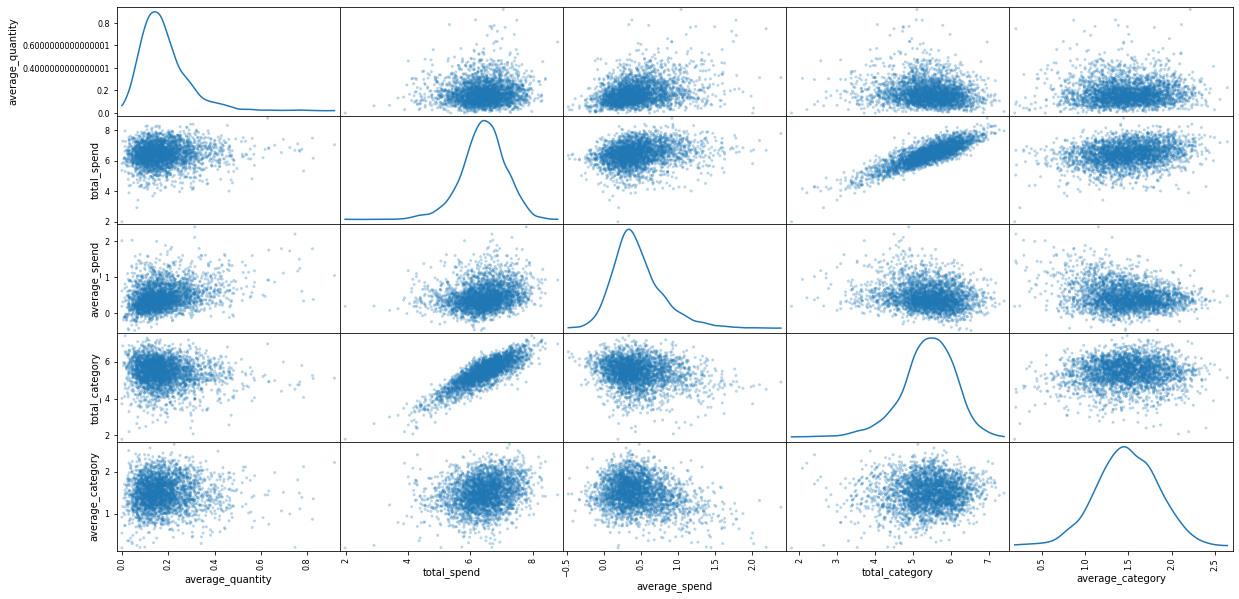

In [39]:
#-- Produce a scatter matrix using the logged data...
scatter = pd.plotting.scatter_matrix(logged_data[['average_quantity','total_spend','average_spend','total_category','average_category']], alpha = 0.3,figsize = (20,10), diagonal = 'kde')

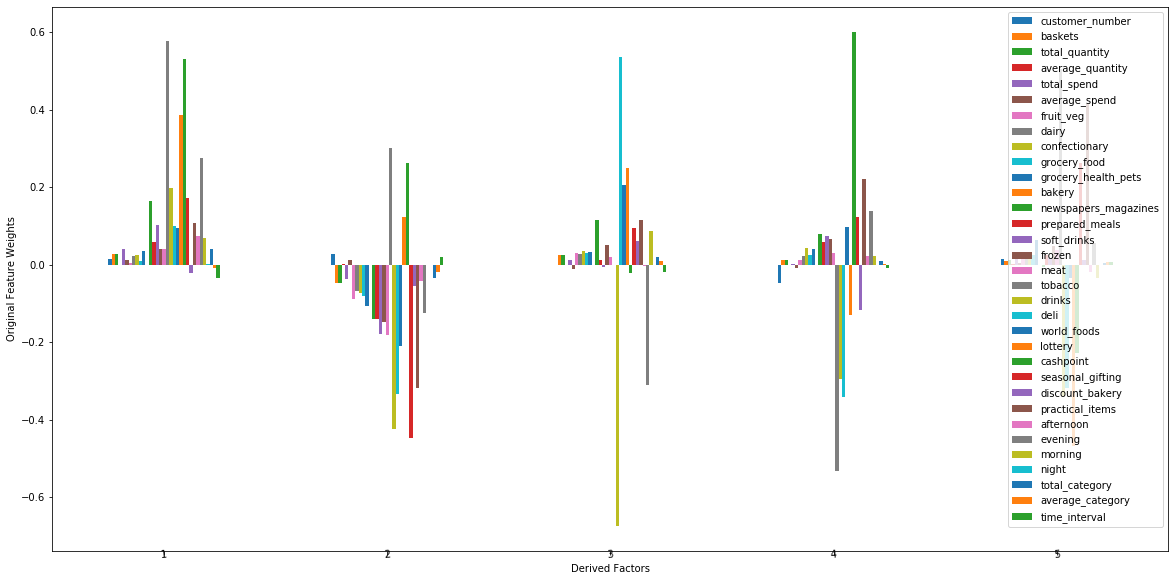

In [40]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=5 )
pca.fit(logged_data)

#-- Generate a PCA results plot 
import pandas

def display_factors(model, original_features):
   dimensions = range(1, len(model.components_) + 1)
   topics = pandas.DataFrame(model.components_, columns = original_features)
   fig, ax = plt.subplots(figsize = (20,10))
   topics.plot(ax = ax, kind = 'bar');
   ax.set_ylabel("Original Feature Weights")
   ax.set_xlabel("Derived Factors")
   ax.set_xticklabels(dimensions, rotation=5,fontdict = {'verticalalignment': 'baseline'})

display_factors(pca, data.columns)

A positive increase in a specific dimension corresponds with an increase of the positive-weighted features and a decrease of the negative-weighted features.



In [41]:
import renders as rs

C:\Users\Carl\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


Dimension 1    0.1885
Dimension 2    0.1246
Dimension 3    0.0892
Dimension 4    0.0800
Dimension 5    0.0715
Name: Explained Variance, dtype: float64

Cumulative sum:
 Dimension 1    0.1885
Dimension 2    0.3131
Dimension 3    0.4023
Dimension 4    0.4823
Dimension 5    0.5538
Name: Explained Variance, dtype: float64


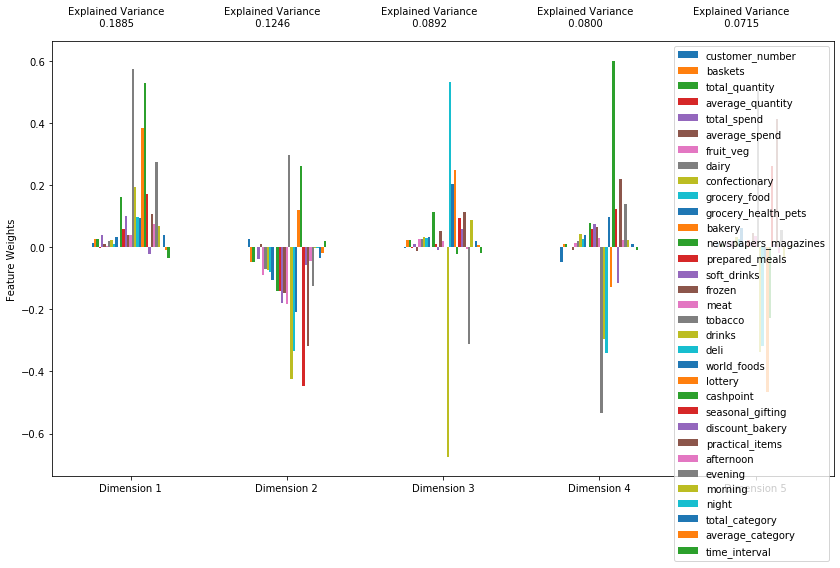

In [42]:
pca_results = rs.pca_results(data, pca)
print (pca_results['Explained Variance'])
print('\nCumulative sum:\n',pca_results['Explained Variance'].cumsum())

31% of the variance in the data is explained by the first and second principal components.
68% of the variance in the data is explained by the first twelve principal components.

* We rerun PCA on our logged_data, so we only use the first two dimensions
* We apply a PCA transformation of good_data using pca.transform, and assign the reuslts to reduced_data.




Let's see how this transformation affected our sample points

### Implementation: Dimensionality Reduction

In [43]:
for t, topic in enumerate(pca.components_):
    print("\nPC", t+1)
    print("----------")
    
    #-- attach the feature name to each topic weighting
    weightings = list(zip(topic, data.columns))
 
    #-- sort the weightings into an order
    ordered_indeces = topic.argsort()
    
    #-- make the order highest first
    reversed_indeces = ordered_indeces[::-1]
    
    #-- reduce it down to only the top 4 items
    top_3_indeces = reversed_indeces[:5]
    
    #-- print the results out to screen
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))
    


PC 1
----------
0.58 tobacco
0.53 cashpoint
0.38 lottery
0.27 evening
0.20 drinks

PC 2
----------
0.30 tobacco
0.26 cashpoint
0.12 lottery
0.03 customer_number
0.02 time_interval

PC 3
----------
0.53 deli
0.25 lottery
0.21 world_foods
0.12 newspapers_magazines
0.12 practical_items

PC 4
----------
0.60 cashpoint
0.22 practical_items
0.14 evening
0.12 seasonal_gifting
0.10 world_foods

PC 5
----------
0.50 tobacco
0.42 practical_items
0.26 seasonal_gifting
0.06 grocery_health_pets
0.06 evening


In [44]:
import squarify


TOPIC 0
----------
0.58 tobacco
0.53 cashpoint
0.38 lottery
0.27 evening
0.20 drinks


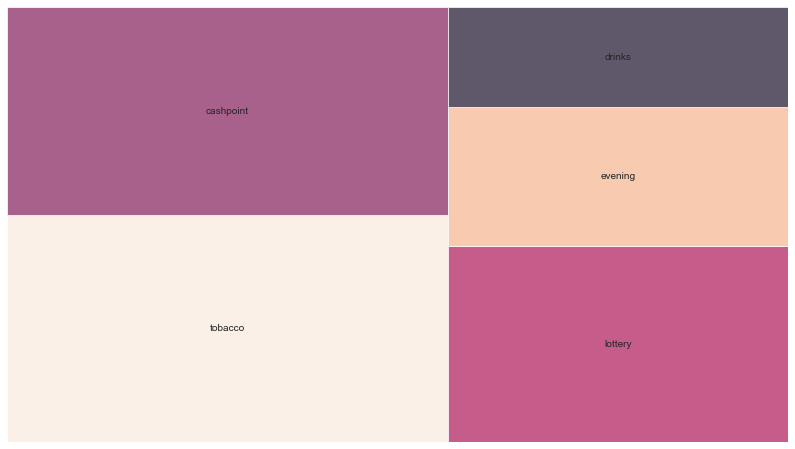


TOPIC 1
----------
0.30 tobacco
0.26 cashpoint
0.12 lottery
0.03 customer_number
0.02 time_interval


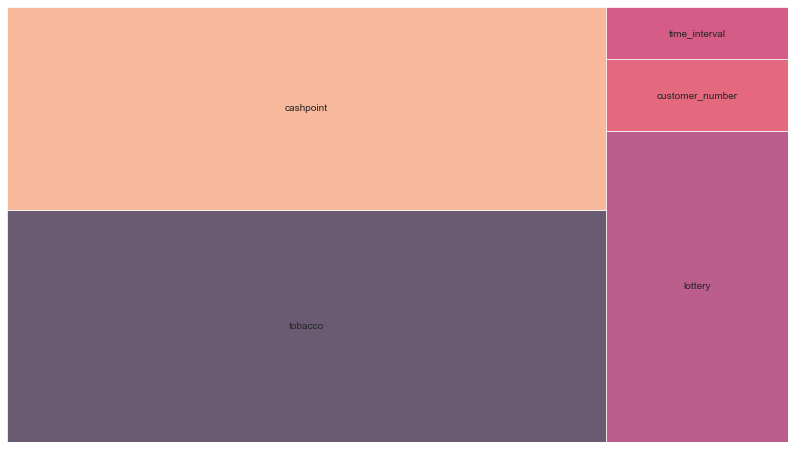

In [94]:
for t, topic in enumerate(pca.components_):
    print("\nTOPIC", t)
    print("----------")
    
    #-- attach the feature name to each topic weighting
    weightings = list(zip(topic, data.columns))
 
    #-- sort the weightings into an order
    ordered_indeces = topic.argsort()
    
    #-- make the order highest first
    reversed_indeces = ordered_indeces[::-1]
    
    #-- reduce it down to only the top 4 items
    top_5_indeces = reversed_indeces[:5]
    
    sizes = []
    labels= []
    
    #-- print the results out to screen
    for i in top_5_indeces:
        sizes.append(weightings[i][0])
        labels.append(weightings[i][1])
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))
        
    
    
    squarify.plot(sizes=sizes, label=labels, alpha=0.7)
    plt.axis('off')
    plt.show()
    

When using principal component analysis, one of the main goals is to reduce the dimensionality of the data as well as  complexity of the problem. 


But, dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the cumulative explained variance ratio is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

Lets try fitting our 30 dimensional row data to three dimensions of 7 PCA dimensions, so it will be easy to visualize.

In [46]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=2 )
pca.fit(logged_data)


PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Dimension 1    0.1885
Dimension 2    0.1246
Name: Explained Variance, dtype: float64

Cumulative sum:
 Dimension 1    0.1885
Dimension 2    0.3131
Name: Explained Variance, dtype: float64


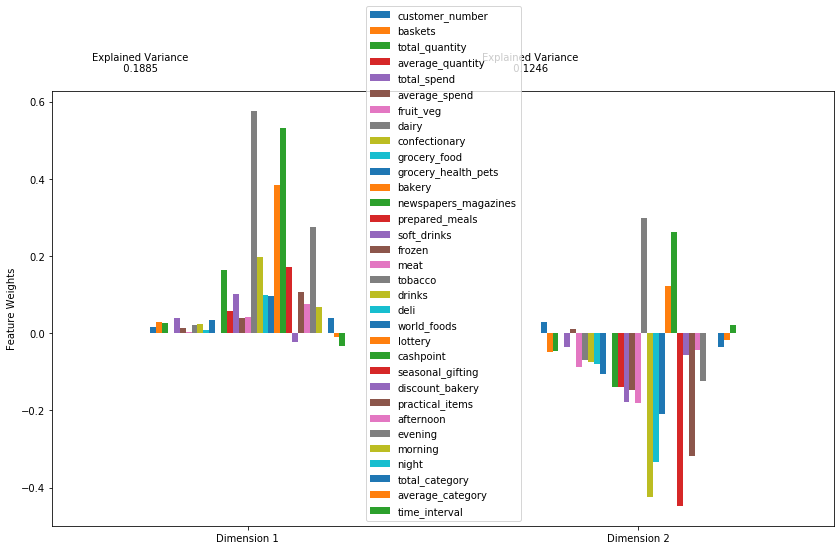

In [47]:
pca_results = rs.pca_results(data, pca)
print (pca_results['Explained Variance'])
print('\nCumulative sum:\n',pca_results['Explained Variance'].cumsum())

In terms of customer spending, the first two dimensions could represent:

* Dimension 1: The first dimension shows a strong correlation with 'tomato', 'drinks' , 'lottery' and 'cashpoint'catagories, in agreement with out previous scatterplot analysis. These catagories are all items for relaxing. Therefore, a customer like a market would have a little value along this dimension.
* Dimension 2: The second dimension shows a strong correlation with 'tobacco', 'drinks','deli','wordfood','seasonalgit' and 'practical items' and could be considered orthogonal to Dimension 1. These catagories are all items used in dailylife, therefore a customer like shopping have a high value along this dimension


# 2.4 NMF of Wholesale Customers

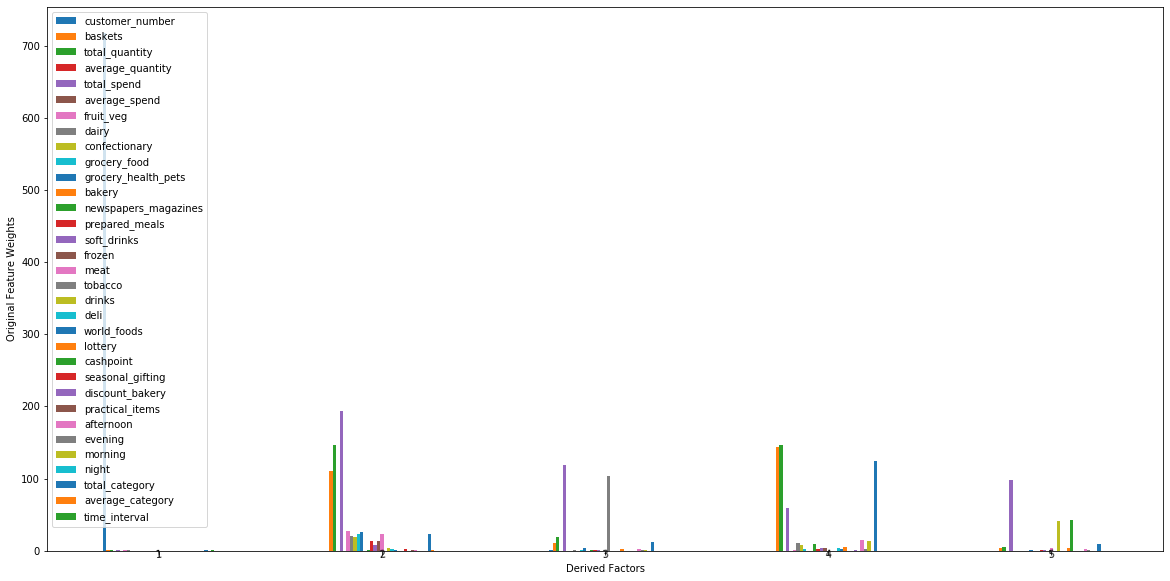

In [48]:
from sklearn.decomposition import NMF

#-- Generate a PCA factorization of your data
nmf = NMF(n_components=5, random_state=1)
nmf.fit(data)

#-- And visualize the results
nmf_results = display_factors(nmf, data.columns)

Well here's my interpretation:
NMF methods perhaps perform bad on this data, so we just turn on the next functions

### Listing the feature weightings in a topic to help interpretation

In [49]:
for t, topic in enumerate(nmf.components_):
    print("\nTOPIC", t+1)
    print("----------")
    
    #-- attach the feature name to each topic weighting
    weightings = list(zip(topic, data.columns))
 
    #-- sort the weightings into an order
    ordered_indeces = topic.argsort()
    
    #-- make the order highest first
    reversed_indeces = ordered_indeces[::-1]
    
    #-- reduce it down to only the top 4 items
    top_3_indeces = reversed_indeces[:5]
    
    #-- print the results out to screen
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))
    


TOPIC 1
----------
717.42 customer_number
1.24 total_spend
0.87 total_quantity
0.76 baskets
0.76 total_category

TOPIC 2
----------
193.40 total_spend
146.82 total_quantity
110.43 baskets
27.81 fruit_veg
25.87 grocery_health_pets

TOPIC 3
----------
118.85 total_spend
103.29 tobacco
19.54 total_quantity
11.55 total_category
10.47 baskets

TOPIC 4
----------
146.80 total_quantity
144.02 baskets
124.69 total_category
58.70 total_spend
15.24 afternoon

TOPIC 5
----------
97.88 total_spend
42.72 cashpoint
41.58 drinks
9.32 total_category
5.17 total_quantity


# 2.5 LDA for Wholesale Customers

Here I compare  new LDA "topics" to the previous options

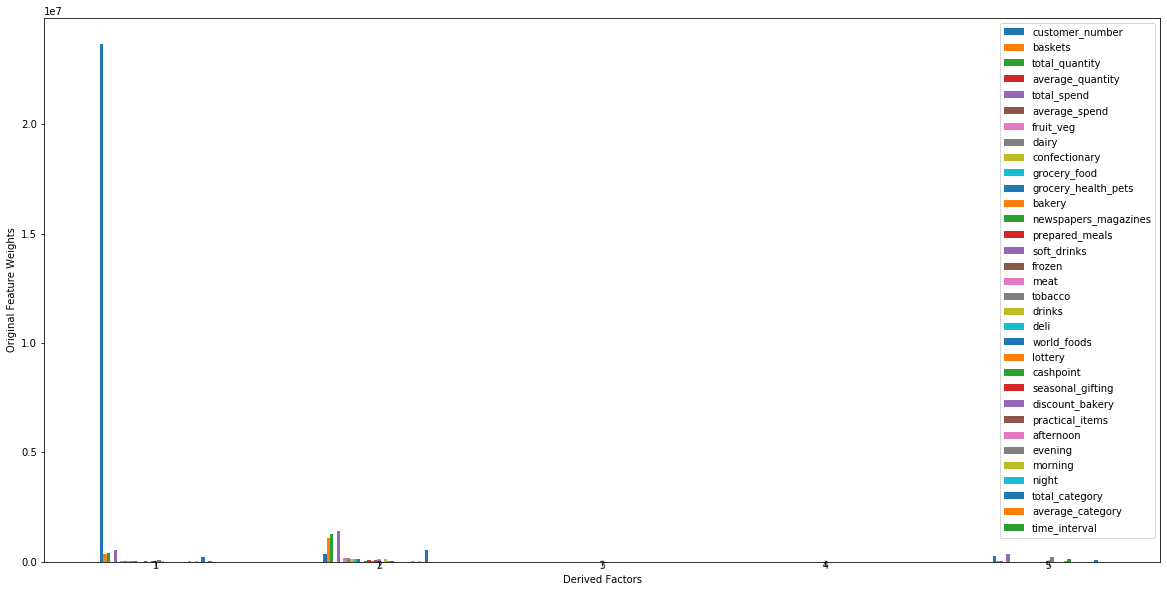

In [50]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(data)
lda_results = display_factors(lda, data.columns)

In [51]:
for t, topic in enumerate(lda.components_):
    print("\nTOPIC", t+1)
    print("----------")
    
    #-- attach the feature name to each topic weighting
    weightings = list(zip(topic, data.columns))
 
    #-- sort the weightings into an order
    ordered_indeces = topic.argsort()
    
    #-- make the order highest first
    reversed_indeces = ordered_indeces[::-1]
    
    #-- reduce it down to only the top 4 items
    top_3_indeces = reversed_indeces[:5]
    
    #-- print the results out to screen
    for i in top_3_indeces:
        print("{:.2f} {}".format(weightings[i][0], weightings[i][1]))
    


TOPIC 1
----------
23655369.81 customer_number
516351.81 total_spend
417674.18 total_quantity
345921.19 baskets
212527.53 total_category

TOPIC 2
----------
1420702.02 total_spend
1283183.50 total_quantity
1069005.21 baskets
550378.88 total_category
347941.08 customer_number

TOPIC 3
----------
9.82 customer_number
0.26 bakery
0.24 night
0.21 time_interval
0.21 average_quantity

TOPIC 4
----------
9.82 customer_number
0.26 bakery
0.24 night
0.21 time_interval
0.21 average_quantity

TOPIC 5
----------
371185.56 total_spend
283843.47 customer_number
213485.17 tobacco
135890.15 cashpoint
64647.17 total_category


## 2.5 Drop the useless feature

## 2.6 Selecting our final Feature

Here we just choose one best performance unsurprised learning methods to reduce our data dimensions.

The PCA performance best among three methods, so here we tramsform the PCA data as our reduced data.

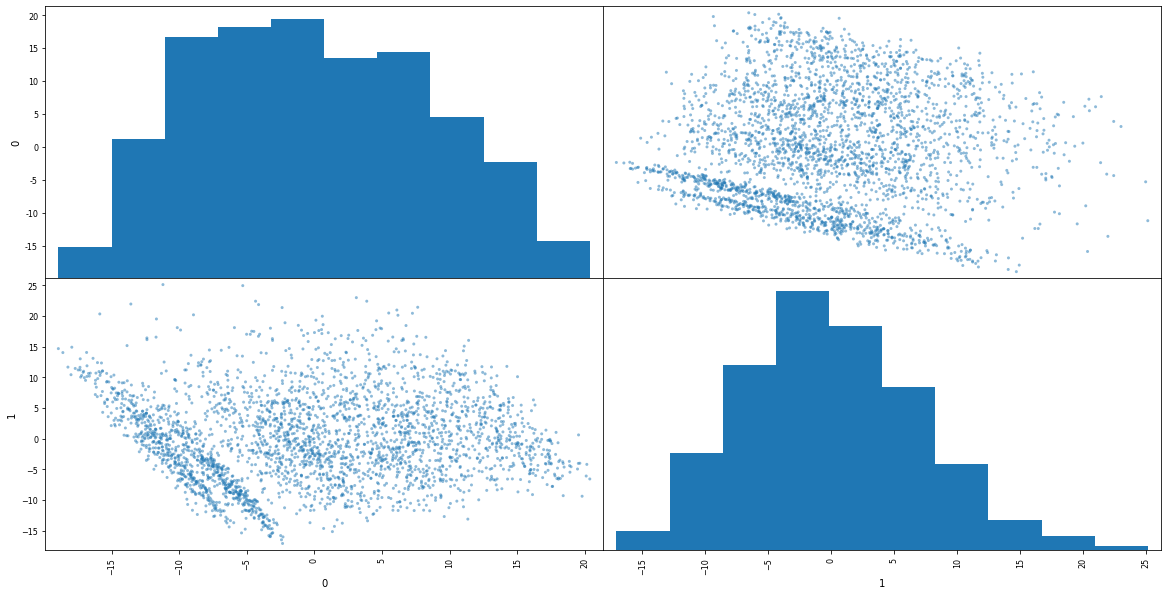

In [52]:
pca = PCA(n_components=2)
pca.fit(logged_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(logged_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data)
scatter = pd.plotting.scatter_matrix(reduced_data, figsize = (20,10))

In [53]:
reduced_data.head()

,0,1
0,6.103102,5.489092
1,-1.187403,-0.958109
2,-10.658819,-4.443852
3,3.689836,-0.907614
4,6.413834,-3.043569


 # 3 Clustering

Finally we create our segments by GaussianMixture, K-Means clustering algorithm to identify the various customer segments hidden in the data.

we expect to have 5 to 7 number of clusters depending on the business problem, and the precious number depending on the  data structure hidden in the data.

Here we use the silhouette coefficient to evalueat each clusters divided performance for each data point.

It measures the similar to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.

## 3.1 GaussianMixture

For n_clusters = 4. The average silhouette_score is : 0.2873991687835701)
For n_clusters = 5. The average silhouette_score is : 0.31637846669153585)
For n_clusters = 6. The average silhouette_score is : 0.3200166431928794)
For n_clusters = 7. The average silhouette_score is : 0.34098717950587687)
For n_clusters = 8. The average silhouette_score is : 0.29195464119498504)


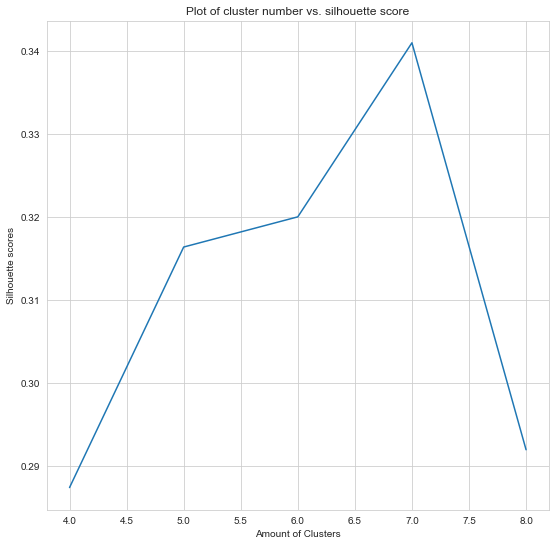

Optimum score: 0.3410


In [95]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

def score_GMM(n_clusters):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters, random_state = 0).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_data)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric = "mahalanobis")
    return score
    
# Make an array of different silhouette_scores for clusters from 2 to 10.
GMM_scores = []
for i in range(4,9): 
    print("For n_clusters = {}. The average silhouette_score is : {})".format(i, score_GMM(i)))
    GMM_scores.append(score_GMM(i))

#Plot silhouette scores for a variety of cluster numbers.
plt.figure(figsize= (9,9))
plt.plot(range(4,9),GMM_scores)
plt.xlabel('Amount of Clusters')
plt.ylabel('Silhouette scores')
plt.title('Plot of cluster number vs. silhouette score')
plt.show()
print ('Optimum score: {:.4f}'.format(max(GMM_scores)))

5 is the best !

For GMM, Bayesian information criterion (BIC) could sometimes be a better criterion for deciding on the optimal number of clusters, since it takes into account the probability information outputted by GMM.  To illustrate this, the experiement has been repeated for the BIC.

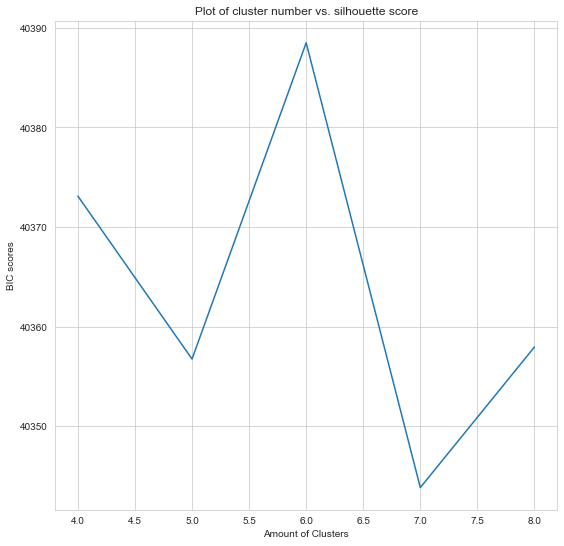

Optimum score: 40343.8177


In [128]:
def score_GMM_BIC(n_clusters):
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=n_clusters, random_state = 0).fit(reduced_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # Find the cluster centers
    centers = clusterer.means_

    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(reduced_data)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = clusterer.bic(reduced_data)
    return score
    
# Make an array of different silhouette_scores for clusters from 2 to 10.
GMM_scores = []
for i in range(4,9):   
    GMM_scores.append(score_GMM_BIC(i))

#Plot silhouette scores for a variety of cluster numbers.
plt.figure(figsize= (9,9))
plt.plot(range(4,9),GMM_scores)
plt.xlabel('Amount of Clusters')
plt.ylabel('BIC scores')
plt.title('Plot of cluster number vs. silhouette score')
plt.show()
print ('Optimum score: {:.4f}'.format(min(GMM_scores)))

As the the model with the lowest BIC is preferred, the optimum score corresponding to 7 clusters. This not agrees with our previous analysis using the silhouette score.




## 3.2 K-means

We try to find the  right number of segments by searching  through a range of k from 4 through to 8 clusters to find out which has the best silhouette score.

range(4, 9)
For n_clusters = 4. The average silhouette_score is : 0.3755244613484931)
For n_clusters = 5. The average silhouette_score is : 0.3646451865590859)
For n_clusters = 6. The average silhouette_score is : 0.3753423376843665)
For n_clusters = 7. The average silhouette_score is : 0.38162429644296164)
For n_clusters = 8. The average silhouette_score is : 0.3692073192436386)


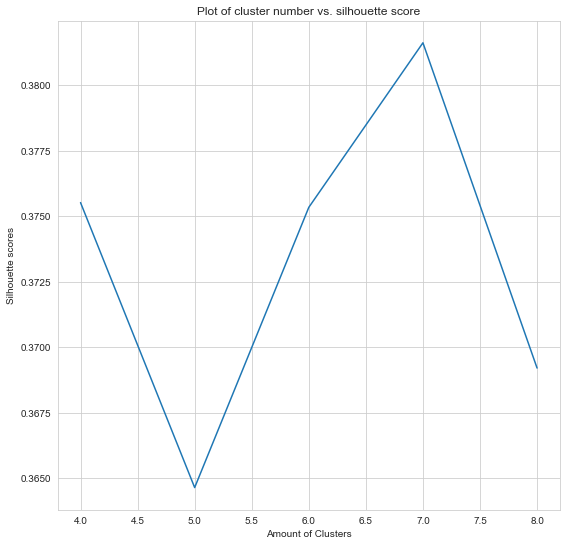

Optimum score: 0.3816


In [97]:

#-- New  imports we will need
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Create range of clusters 
range_clusters = range(4,9)
print(range_clusters)


pca_scores = []
# Loop through different k solutions and assess the silhouette socore 
for i in range_clusters:
    clusterer = KMeans(n_clusters=i)
    clusterer.fit(reduced_data)

#-- Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
#-- Calculate a silhouette score for the 3 segment solution
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(i, score))

    pca_scores.append(score)

#Plot silhouette scores for a variety of cluster numbers.
plt.figure(figsize= (9,9))
plt.plot(range(4,9),pca_scores)
plt.xlabel('Amount of Clusters')
plt.ylabel('Silhouette scores')
plt.title('Plot of cluster number vs. silhouette score')
plt.show()
print ('Optimum score: {:.4f}'.format(max(pca_scores)))




 Here we pick the highest score of  n_clusters = 6.

## 3.3 Cluster Visualisation


We will now visualize the clusters that we have created:

In [57]:
#### PCA

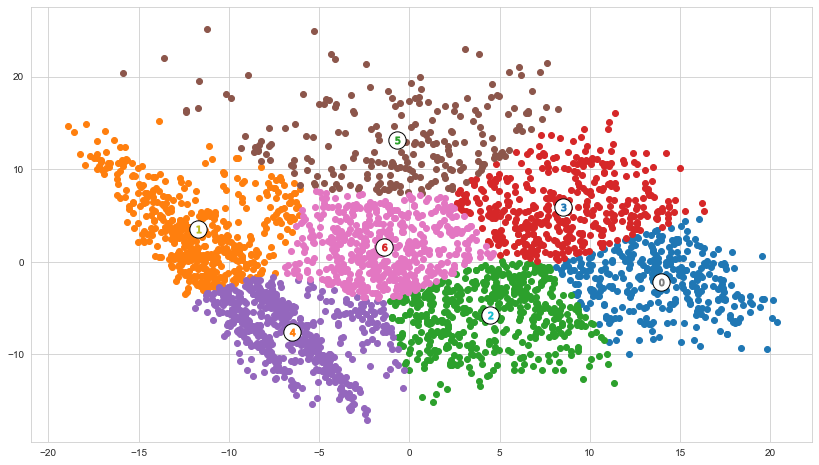

In [100]:
#-- Our final clustering solution
clusterer = KMeans(n_clusters=7).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.cluster_centers_

#-- Put the predictions into a pandas dataframe format
assignments = pandas.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pandas.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (14.0, 8.0)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

In [59]:
#### GMM

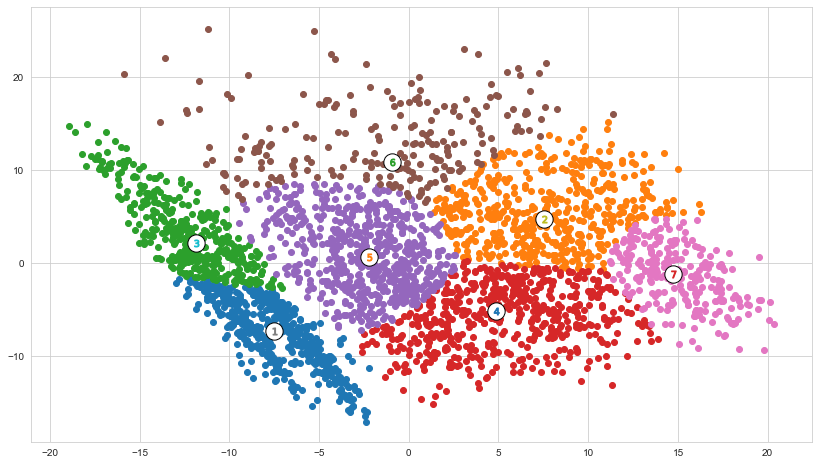

In [130]:
clusterer = GaussianMixture(n_components=7, random_state = 0).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centres = clusterer.means_

#-- Put the predictions into a pandas dataframe format
assignments = pandas.DataFrame(preds, columns = ['Cluster'])

#-- Put the predictions into a pandas dataframe format
plot_data = pandas.concat([assignments, reduced_data], axis = 1)

#-- Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (14.0, 8.0)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i+1), alpha = 1, s=50);

In [103]:
plot_data

,Cluster,0,1
0,1,6.103102,5.489092
1,4,-1.187403,-0.958109
2,0,-10.658819,-4.443852
3,3,3.689836,-0.907614
4,3,6.413834,-3.043569
5,1,11.459854,7.943871
6,1,8.450721,4.436306
7,0,-9.964058,-4.335839
8,0,-8.383970,-9.167566
9,0,-9.864173,-5.395623


## 3.4 Recovering  to original Segment Archetypes

We can now assign some values to be used later for predictions and centers.

In [104]:
#True centers,archetypes


log_centres = pca.inverse_transform(centres)


true_centres = np.exp(log_centres)


segments = ['Segment {}'.format(i+1) for i in range(0, len(centres))]
true_centres = pd.DataFrame(np.round(true_centres), columns = data.columns)
true_centres.index = segments


In [105]:

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

# 4 Creating Profiles and conclusions

In [106]:
#create profile
assignments = pd.DataFrame(preds, columns = ['Cluster'])

final_assigments = pd.concat([assignments, data], axis = 1)
results = final_assigments[final_assigments.columns[:2]]
print(results)


for c, d in final_assigments.groupby('Cluster'):  
    print("SEGMENT", c+1)
    locals()['Cluster'+str(c+1)]=d
    display(d.describe()) 


      Cluster  customer_number
0           1             4749
1           4             4757
2           0              144
3           3              572
4           3              669
5           1              792
6           1              928
7           0             1031
8           0             1079
9           0             1325
10          1             1395
11          2             1869
12          5             2301
13          3             2377
14          0             2925
15          6             3070
16          3             3116
17          0             3149
18          6             3566
19          2             4005
20          0             4446
21          4            11801
22          4             9311
23          2            11798
24          4            11796
25          5            12014
26          1            12016
27          2            12008
28          4            12019
29          2            14780
30          5            14770
31      

,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,516.0,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000
mean,0.0,6586.912791,543.881783,651.660853,1.198007,765.254438,1.443023,102.835329,85.011822,69.945291,77.876589,79.143295,1.000000e-04,14.553443,45.350874,23.081282,44.511688,70.004148,1.000000e-04,67.797690,18.385815,10.074315,0.050486,1.000000e-04,8.365713,2.398631,3.281462,26.106591,4.736475,18.629854,1.000000e-04,251.184109,5.710834,8.463178
std,0.0,5031.627841,315.993338,387.942278,0.133261,452.760849,0.352122,88.953267,61.349305,63.049981,61.521812,77.901433,8.682034e-19,20.711920,45.252192,28.367817,41.698338,73.265796,8.682034e-19,113.005918,27.213713,14.382262,0.611674,8.682034e-19,12.447255,10.467728,5.872869,20.370790,8.560233,23.161574,8.682034e-19,131.277543,1.933723,16.951118
min,0.0,14.000000,40.000000,52.000000,1.007692,69.470000,0.650000,0.770000,2.190000,0.870000,1.460000,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,29.000000,1.872093,1.000000
25%,0.0,1934.250000,315.500000,366.750000,1.119971,444.927500,1.220000,42.827500,39.725000,28.057500,32.817500,30.155000,1.000000e-04,2.292500,12.930000,5.377500,14.357500,24.005000,1.000000e-04,5.057500,1.160000,1.470000,0.000100,1.000000e-04,1.307500,0.000100,0.000100,12.000000,0.000100,3.000000,1.000000e-04,156.000000,4.266433,1.000000
50%,0.0,7063.500000,471.500000,562.500000,1.170278,662.775000,1.390000,80.200000,70.395000,49.995000,62.430000,51.615000,1.000000e-04,7.405000,32.100000,14.435000,32.000000,49.970000,1.000000e-04,23.335000,7.510000,4.635000,0.000100,1.000000e-04,4.175000,0.000100,0.840000,21.000000,1.000000,10.500000,1.000000e-04,228.000000,5.420204,3.000000
75%,0.0,11153.000000,691.000000,825.750000,1.242251,948.560000,1.610000,124.352500,112.682500,91.760000,106.820000,104.762500,1.000000e-04,18.757500,60.390000,30.890000,62.202500,89.152500,1.000000e-04,79.645000,24.437500,13.452500,0.000100,1.000000e-04,10.150000,0.000100,3.812500,36.000000,6.000000,25.000000,1.000000e-04,320.250000,6.767308,8.000000
max,0.0,16316.000000,2053.000000,2825.000000,2.503686,2871.290000,3.410000,601.910000,332.780000,529.590000,337.830000,538.200000,1.000000e-04,199.020000,270.910000,280.830000,320.590000,674.850000,1.000000e-04,837.260000,187.790000,98.120000,12.000000,1.000000e-04,114.870000,158.440000,47.540000,127.000000,83.000000,164.000000,1.000000e-04,885.000000,14.083333,147.000000


SEGMENT 2


,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,482.0,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,4.820000e+02,482.000000,482.000000,482.000000
mean,1.0,7857.939834,436.209544,522.591286,1.202706,785.567573,1.968029,45.407636,58.743361,47.625477,42.275001,48.084649,1.000000e-04,17.979511,29.606103,20.548449,24.740316,37.658803,176.824964,47.156032,7.351621,6.980481,26.015182,107.780596,3.625567,1.087789,1.115694,40.070540,10.518691,28.404567,1.000000e-04,289.985477,3.942070,6.890041
std,0.0,4138.210681,271.205984,330.437606,0.137846,487.592231,0.848035,42.522509,47.305608,45.152415,42.395015,59.332028,7.325968e-19,25.569897,39.534855,34.834151,29.610482,48.187723,268.585119,94.622249,17.793438,14.194516,54.946236,181.595464,8.511390,6.225060,2.620362,28.268448,16.372874,33.953497,7.325968e-19,172.189574,1.327461,15.170354
min,1.0,170.000000,70.000000,83.000000,1.012346,138.580000,0.820000,0.000100,0.370000,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,45.000000,1.378788,1.000000
25%,1.0,4754.000000,248.250000,298.250000,1.116309,472.770000,1.410000,14.035000,25.837500,18.442500,14.170000,14.442500,1.000000e-04,2.592500,7.655000,4.195000,6.442500,8.127500,13.355000,0.000100,0.000100,0.212500,0.000100,10.000000,0.000100,0.000100,0.000100,20.000000,1.000000,6.000000,1.000000e-04,163.250000,3.027027,1.000000
50%,1.0,6114.500000,379.500000,454.500000,1.175345,679.760000,1.735000,32.810000,46.520000,37.240000,29.590000,30.990000,1.000000e-04,9.535000,18.305000,10.275000,16.385000,23.755000,73.580000,8.830000,1.115000,2.885000,4.000000,40.000000,0.840000,0.000100,0.000100,34.000000,5.000000,15.000000,1.000000e-04,253.500000,3.732619,2.000000
75%,1.0,10889.500000,565.750000,675.750000,1.246988,948.890000,2.277500,64.175000,78.872500,62.000000,57.482500,63.455000,1.000000e-04,21.232500,39.372500,24.085000,33.570000,50.350000,235.187500,41.955000,7.002500,8.435000,26.875000,135.875000,3.965000,0.000100,1.180000,55.000000,12.000000,38.000000,1.000000e-04,366.750000,4.620922,5.000000
max,1.0,16295.000000,2573.000000,3499.000000,2.174468,4448.190000,6.180000,294.180000,408.890000,533.050000,418.810000,655.760000,1.000000e-04,202.910000,454.290000,529.650000,322.060000,575.510000,2488.940000,684.490000,214.950000,207.330000,438.000000,1751.900000,106.460000,69.670000,25.400000,182.000000,128.000000,194.000000,1.000000e-04,1169.000000,9.344828,139.000000


SEGMENT 3


,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,385.0,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,3.850000e+02,385.000000,385.000000,385.000000,385.000000,385.000000,3.850000e+02,385.000000,385.000000,385.000000,385.000000,3.850000e+02,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,3.850000e+02,385.000000,385.000000,385.000000
mean,2.0,9226.787013,321.480519,386.202597,1.210882,419.482390,1.377688,56.466157,57.693975,41.759975,50.372495,39.951250,1.000000e-04,8.059697,23.267674,11.668093,27.067439,36.719934,1.000000e-04,20.968165,8.274135,4.854424,0.075423,1.000000e-04,1.789630,1.555542,0.676133,17.228575,2.020837,17.218195,1.000000e-04,163.722078,5.136288,15.815584
std,0.0,5622.763283,199.032714,237.865542,0.154641,255.932115,0.404624,51.203015,46.326652,36.424812,43.237624,43.514707,1.899823e-19,20.200115,29.629639,26.796609,34.931138,45.738106,1.899823e-19,71.219622,20.772379,7.511761,1.085906,1.899823e-19,6.118959,10.309912,1.808229,17.868722,4.745542,23.928469,1.899823e-19,107.687715,1.777170,30.464371
min,2.0,45.000000,15.000000,16.000000,1.006849,18.360000,0.620000,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,8.000000,1.272727,1.000000
25%,2.0,2842.000000,168.000000,204.000000,1.115607,227.400000,1.140000,18.260000,24.170000,16.020000,17.980000,12.030000,1.000000e-04,0.000100,4.160000,1.100000,5.550000,9.480000,1.000000e-04,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,5.000000,0.000100,2.000000,1.000000e-04,82.000000,3.764706,2.000000
50%,2.0,12159.000000,292.000000,347.000000,1.175141,383.040000,1.310000,42.650000,46.430000,30.780000,38.990000,26.040000,1.000000e-04,1.900000,14.440000,5.000000,13.410000,22.080000,1.000000e-04,0.000100,0.000100,1.910000,0.000100,1.000000e-04,0.000100,0.000100,0.000100,12.000000,0.000100,8.000000,1.000000e-04,149.000000,4.900000,4.000000
75%,2.0,14037.000000,433.000000,527.000000,1.260780,541.970000,1.520000,79.260000,78.290000,54.020000,69.490000,51.820000,1.000000e-04,7.400000,31.110000,13.820000,37.620000,45.050000,1.000000e-04,9.950000,4.680000,6.530000,0.000100,1.000000e-04,1.010000,0.000100,0.000100,24.000000,2.000000,23.000000,1.000000e-04,218.000000,6.250000,11.000000
max,2.0,16144.000000,1081.000000,1328.000000,2.283951,1640.510000,4.450000,286.280000,294.620000,232.300000,276.210000,239.450000,1.000000e-04,192.060000,234.630000,445.950000,250.480000,344.260000,1.000000e-04,1005.330000,189.270000,62.700000,21.000000,1.000000e-04,60.420000,173.060000,11.040000,126.000000,47.000000,144.000000,1.000000e-04,688.000000,11.000000,165.000000


SEGMENT 4


,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,542.0,542.000000,542.000000,542.00000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02,542.000000,542.000000,542.000000
mean,3.0,7559.527675,650.518450,782.99631,1.202714,1029.298044,1.641568,92.740812,94.377011,77.506162,78.821162,87.127011,1.000000e-04,24.158676,48.950628,37.201588,49.481329,82.106754,102.170087,106.100910,20.276711,11.774674,15.979202,34.396251,11.527736,3.182097,3.756878,45.409594,12.186364,22.763842,1.000000e-04,359.001845,4.826414,5.501845
std,0.0,3855.320503,376.394077,477.51499,0.106713,625.413093,0.471858,87.651042,68.182066,67.983433,76.407166,82.478135,9.631183e-19,31.549620,46.781310,44.205368,51.845126,86.745447,197.088481,155.414198,28.127577,16.769158,52.437068,86.219628,16.067022,12.592180,5.705827,33.068714,16.855368,28.606246,9.631183e-19,191.474100,1.471895,13.482754
min,3.0,61.000000,123.000000,141.00000,1.029046,202.670000,0.630000,0.000100,2.560000,4.370000,1.330000,2.160000,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,79.000000,1.732523,1.000000
25%,3.0,4981.750000,397.000000,472.00000,1.129752,620.390000,1.340000,40.005000,47.547500,34.470000,31.902500,33.490000,1.000000e-04,4.605000,17.835000,10.052500,15.712500,25.760000,0.000100,11.107500,2.505000,2.892500,0.000100,0.000100,2.850000,0.000100,0.000100,24.000000,1.000000,5.000000,1.000000e-04,225.000000,3.764867,1.000000
50%,3.0,8235.500000,557.500000,661.00000,1.184009,871.790000,1.530000,74.705000,78.120000,58.990000,58.890000,61.795000,1.000000e-04,12.405000,35.080000,23.365000,31.610000,59.150000,11.080000,44.445000,8.595000,7.250000,0.000100,0.000100,6.655000,0.000100,1.920000,35.500000,6.000000,13.000000,1.000000e-04,322.500000,4.609774,2.000000
75%,3.0,10394.500000,798.750000,962.75000,1.250289,1275.252500,1.850000,117.837500,124.042500,96.935000,102.797500,112.662500,1.000000e-04,31.132500,64.930000,45.617500,64.955000,105.775000,98.497500,120.362500,27.210000,14.972500,9.000000,25.000000,14.207500,0.000100,4.707500,58.750000,16.000000,29.000000,1.000000e-04,435.750000,5.745238,4.000000
max,3.0,16292.000000,2638.000000,4949.00000,1.876042,6588.650000,4.050000,1262.970000,708.040000,614.370000,1017.070000,509.930000,1.000000e-04,249.700000,407.820000,379.950000,385.800000,713.280000,1479.950000,910.660000,235.150000,172.620000,690.000000,1030.000000,157.100000,154.790000,65.060000,301.000000,129.000000,204.000000,1.000000e-04,1455.000000,10.434783,148.000000


SEGMENT 5


,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,600.0,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000
mean,4.0,8000.175000,392.888333,470.771667,1.207534,577.01370,1.582983,59.047184,59.196967,45.487884,49.706300,44.800668,1.000000e-04,12.749003,28.100588,16.423641,29.680253,45.500923,56.531482,45.473084,11.508692,7.734754,7.931067,18.165974,3.740010,1.696823,1.355788,28.235002,4.318371,22.190008,1.000000e-04,227.541667,4.497717,9.878333
std,0.0,4843.998741,240.497459,288.148947,0.139290,338.87559,0.619597,55.283595,44.241436,39.386876,42.905635,47.998174,1.152926e-18,24.229246,31.890531,24.906700,34.097253,53.571263,146.604468,92.121302,20.659619,12.409228,38.147326,66.287162,12.263926,8.932189,3.447566,23.436406,7.597337,27.230057,1.152926e-18,133.992917,1.499798,22.036626
min,4.0,52.000000,34.000000,38.000000,1.011321,61.28000,0.780000,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,25.000000,1.333333,1.000000
25%,4.0,3839.500000,218.750000,261.000000,1.117682,350.05000,1.230000,20.865000,27.380000,17.800000,18.897500,15.195000,1.000000e-04,0.795000,6.432500,3.042500,8.002500,9.015000,0.000100,0.000100,0.000100,0.877500,0.000100,0.000100,0.000100,0.000100,0.000100,11.000000,0.000100,4.000000,1.000000e-04,133.000000,3.449679,1.000000
50%,4.0,7549.000000,342.500000,410.500000,1.179369,500.12000,1.420000,41.480000,48.595000,34.890000,36.645000,29.275000,1.000000e-04,5.445000,17.255000,8.650000,19.215000,28.130000,0.840000,9.005000,2.050000,3.000000,0.000100,0.000100,1.150000,0.000100,0.000100,23.000000,1.000000,12.000000,1.000000e-04,195.000000,4.350926,3.000000
75%,4.0,12637.250000,505.500000,595.750000,1.258598,712.84250,1.770000,79.990000,79.575000,61.892500,68.347500,58.945000,1.000000e-04,15.195000,37.252500,21.055000,39.837500,60.995000,26.047500,48.995000,14.160000,9.655000,2.000000,5.000000,3.820000,0.000100,1.140000,39.000000,5.000000,30.000000,1.000000e-04,292.250000,5.333333,7.000000
max,4.0,16303.000000,1591.000000,2042.000000,2.155963,2000.22000,6.510000,390.120000,268.210000,253.710000,262.860000,432.080000,1.000000e-04,351.730000,264.920000,313.930000,245.130000,407.270000,1010.230000,846.080000,177.970000,125.640000,591.000000,927.750000,209.930000,110.690000,34.080000,215.000000,71.000000,163.000000,1.000000e-04,890.000000,10.200000,164.000000


SEGMENT 6


,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,222.0,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,2.220000e+02,222.000000,222.000000,222.000000
mean,5.0,10613.423423,263.576577,319.630631,1.228439,502.757477,2.309820,28.545183,37.869192,29.960365,36.419149,25.315550,1.000000e-04,8.954582,16.479297,7.477105,16.727004,18.125203,139.814167,13.264809,3.688760,4.327073,19.489241,68.623555,0.729323,0.500095,0.310045,20.941445,3.878436,25.693700,1.000000e-04,171.391892,3.684872,16.567568
std,0.0,4831.432810,187.205602,221.425756,0.177131,337.983876,1.493316,33.499592,37.578885,40.131464,40.319651,34.473492,3.667452e-19,17.266032,22.736749,16.137837,25.893661,27.371450,205.649572,62.445004,9.196521,10.191616,72.429282,190.113389,4.168993,4.064257,1.208928,24.508767,10.315743,28.418741,3.667452e-19,118.541989,1.327501,33.578333
min,5.0,258.000000,6.000000,6.000000,1.000000,7.280000,0.720000,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,6.000000,1.200000,1.000000
25%,5.0,4840.000000,116.000000,137.250000,1.108909,264.437500,1.322500,5.950000,10.100000,6.397500,7.215000,4.190000,1.000000e-04,0.000100,1.815000,0.000100,1.390000,0.950000,1.185000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,6.000000,0.000100,5.000000,1.000000e-04,83.000000,2.812698,1.000000
50%,5.0,12466.500000,235.000000,301.000000,1.187877,447.700000,1.770000,16.100000,27.190000,18.510000,21.390000,13.625000,1.000000e-04,1.985000,8.650000,2.185000,6.870000,7.635000,38.715000,0.000100,0.000100,0.560000,0.000100,10.000000,0.000100,0.000100,0.000100,14.500000,0.000100,15.000000,1.000000e-04,153.500000,3.491795,3.000000
75%,5.0,14654.250000,356.750000,448.500000,1.302743,665.595000,2.750000,38.385000,51.517500,39.792500,52.572500,28.672500,1.000000e-04,10.700000,20.032500,7.602500,19.647500,24.457500,216.360000,0.000100,1.785000,4.035000,10.750000,70.000000,0.000100,0.000100,0.000100,29.000000,2.000000,38.000000,1.000000e-04,234.750000,4.521752,9.750000
max,5.0,16306.000000,1247.000000,1574.000000,2.276667,2407.450000,10.840000,181.410000,194.300000,391.780000,254.080000,285.570000,1.000000e-04,153.620000,146.780000,124.420000,137.440000,187.820000,1272.290000,749.320000,56.520000,78.230000,946.000000,2137.010000,35.720000,47.330000,12.120000,245.000000,76.000000,187.000000,1.000000e-04,729.000000,7.166667,156.000000


SEGMENT 7


,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,253.0,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,6.0,9070.897233,789.806324,934.889328,1.187058,1413.135613,1.863755,77.662648,96.592846,82.870632,76.831660,93.321502,1.000000e-04,31.423758,50.444585,47.139131,50.370830,78.992134,284.898972,131.248425,24.819067,12.836410,49.158939,155.196877,11.754474,0.909381,2.525694,63.217392,19.399217,37.098817,0.004052,497.956522,4.420158,3.952569
std,0.0,2587.173992,415.995114,492.722913,0.114400,742.466129,0.593370,64.640579,69.229612,69.331400,63.738821,94.481358,3.938023e-19,34.436259,51.081311,51.673074,52.305106,85.846018,297.163601,185.794869,41.032364,23.437898,76.364898,176.919064,20.493328,7.087426,4.045887,39.756453,23.829470,38.799263,0.062863,246.245526,1.272730,7.708332
min,6.0,1891.000000,134.000000,163.000000,1.003717,291.100000,0.890000,0.890000,11.550000,2.850000,1.740000,0.700000,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.400000,0.840000,0.000100,0.000100,0.000100,0.000100,2.000000,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,66.000000,2.129683,1.000000
25%,6.0,6632.000000,532.000000,612.000000,1.119593,904.080000,1.450000,34.110000,51.970000,39.260000,33.140000,37.210000,1.000000e-04,8.280000,17.050000,13.800000,18.530000,23.800000,54.370000,12.830000,2.430000,2.940000,5.000000,35.000000,2.680000,0.000100,0.000100,37.000000,4.000000,10.000000,0.000100,333.000000,3.506024,1.000000
50%,6.0,10023.000000,699.000000,826.000000,1.157337,1261.200000,1.710000,60.480000,78.220000,63.250000,57.480000,67.830000,1.000000e-04,21.060000,33.650000,29.890000,36.230000,52.840000,186.470000,53.200000,9.500000,8.250000,18.000000,90.000000,5.750000,0.000100,1.100000,54.000000,10.000000,21.000000,0.000100,439.000000,4.280488,1.000000
75%,6.0,10822.000000,949.000000,1143.000000,1.227729,1747.230000,2.160000,105.370000,120.160000,102.630000,100.230000,116.040000,1.000000e-04,44.920000,67.850000,63.130000,65.450000,106.720000,400.240000,187.080000,28.120000,16.050000,59.000000,215.000000,12.230000,0.000100,3.400000,83.000000,28.000000,55.000000,0.000100,585.000000,5.058140,3.000000
max,6.0,15685.000000,3119.000000,3460.000000,1.934322,4446.800000,4.520000,394.920000,433.090000,440.430000,425.360000,884.450000,1.000000e-04,265.100000,372.360000,378.160000,369.730000,654.300000,1567.440000,993.050000,316.190000,321.490000,393.500000,1500.000000,229.440000,85.420000,38.940000,231.000000,138.000000,178.000000,1.000000,1650.000000,8.926471,67.000000


In [107]:
#-- each cluster numbers

final_assigments.Cluster.value_counts()

4    600
3    542
0    516
1    482
2    385
6    253
5    222
Name: Cluster, dtype: int64

The group  1,2,3,4,5 have 505,486,396,731,882 customers

In [247]:
final_assigments.head()

,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
0,1,4749,220,260,1.181818,631.12,2.87,14.45,35.61,24.01,9.99,32.69,0.0001,20.92,30.57,17.38,10.1900,2.17,1.6800,124.8800,0.0001,0.0001,0.0001,290.0000,0.0001,0.0001,2.2000,30.0,49.0000,13.0000,0.0001,177,1.923913,4.0
1,4,4757,248,333,1.342742,452.42,1.82,82.21,162.78,46.03,21.16,20.92,0.0001,1.40,40.90,18.95,0.0001,6.07,4.6600,21.8400,14.1900,0.0001,0.0001,0.0001,2.7100,0.0001,0.0001,15.0,7.0000,5.0000,0.0001,112,4.148148,4.0
2,0,144,226,303,1.340708,261.16,1.16,35.32,36.67,48.90,64.14,7.95,0.0001,4.48,14.31,0.42,2.0900,8.37,0.0001,2.5500,3.8000,21.1800,0.0001,0.0001,1.2700,0.0001,0.0001,22.0,0.0001,0.0001,0.0001,138,6.272727,4.0
3,3,572,285,346,1.214035,638.79,2.24,39.98,16.83,43.84,13.48,3.63,0.0001,42.75,8.79,10.00,19.8500,20.85,271.8400,0.0001,37.0700,10.9800,19.0000,0.0001,13.9100,5.9200,3.4000,20.0,0.0001,20.0000,0.0001,164,4.100000,2.0
4,3,669,285,324,1.136842,561.42,1.97,14.69,18.41,6.53,3.47,23.08,0.0001,18.70,9.16,37.35,4.9800,47.19,22.3200,319.5400,0.0001,0.9900,12.5000,0.0001,2.9700,0.0001,1.6600,22.0,7.0000,7.0000,0.0001,182,5.055556,2.0


### Total customers

In [109]:
data.describe()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,8095.724333,487.105000,583.722000,1.204499,769.412937,1.682477,69.456164,71.302684,57.347794,60.007531,60.909868,1.000000e-04,16.653405,35.480575,23.303357,35.466025,54.740693,92.547661,62.242247,13.736475,8.554280,14.259199,45.330643,6.127023,1.814925,2.016280,33.871335,7.752366,23.558340,0.000433,275.851000,4.691742,9.121333
std,4686.259488,332.824524,405.006359,0.136323,552.769022,0.733105,70.499653,57.966264,55.959350,57.682532,69.805022,5.584572e-18,26.377081,41.240466,35.695587,41.477605,67.802121,201.703789,121.500349,25.486117,14.757733,48.412916,123.584339,13.104253,9.450350,4.322204,29.864884,14.222397,29.350811,0.018256,184.300706,1.679788,20.938531
min,14.000000,6.000000,6.000000,1.000000,7.280000,0.620000,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,6.000000,1.200000,1.000000
25%,4044.750000,257.000000,307.750000,1.119625,406.120000,1.260000,22.695000,31.390000,21.070000,21.087500,18.145000,1.000000e-04,1.500000,8.700000,3.750000,8.777500,12.640000,0.000100,0.000100,0.000100,0.890000,0.000100,0.000100,0.000100,0.000100,0.000100,13.000000,0.000100,4.000000,0.000100,150.000000,3.488809,1.000000
50%,8218.500000,417.000000,495.000000,1.175889,627.170000,1.490000,50.935000,56.875000,42.290000,44.030000,39.075000,1.000000e-04,7.345000,23.095000,11.685000,22.275000,32.930000,2.030000,12.830000,3.495000,3.760000,0.000100,0.000100,1.990000,0.000100,0.000100,27.000000,2.000000,13.000000,0.000100,233.000000,4.406829,3.000000
75%,12115.500000,628.250000,744.250000,1.250430,957.675000,1.860000,93.405000,95.327500,75.125000,80.922500,77.250000,1.000000e-04,19.687500,47.330000,28.782500,47.237500,72.380000,81.030000,65.150000,15.770000,10.647500,6.000000,30.000000,6.720000,0.000100,2.510000,46.000000,9.000000,30.000000,0.000100,359.000000,5.626542,7.000000
max,16316.000000,3119.000000,4949.000000,2.503686,6588.650000,10.840000,1262.970000,708.040000,614.370000,1017.070000,884.450000,1.000000e-04,351.730000,454.290000,529.650000,385.800000,713.280000,2488.940000,1005.330000,316.190000,321.490000,946.000000,2137.010000,229.440000,173.060000,65.060000,301.000000,138.000000,204.000000,1.000000,1650.000000,14.083333,165.000000


Here we highlight the max features of the ceters, which is alos the mean of each cluster.

In [110]:
true_centres.style.highlight_max()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
Segment 1,4304,445,531,1,590,1,73,68,50,60,48,0,1,21,9,25,42,0,3,1,1,0,0,1,0,0,15,0,4,0,212,5,4
Segment 2,7663,382,459,1,697,2,27,41,30,27,23,0,3,10,5,8,9,31,0,0,0,0,4,0,0,0,27,1,10,0,253,4,3
Segment 3,5246,251,302,1,351,1,31,32,22,27,15,0,0,4,1,5,6,0,0,0,0,0,0,0,0,0,7,0,3,0,129,5,5
Segment 4,5548,570,680,1,901,2,64,77,58,57,60,0,7,33,21,30,48,0,16,2,3,0,0,2,0,0,34,1,8,0,321,5,3
Segment 5,5854,354,424,1,546,2,37,44,32,34,25,0,1,9,4,10,12,0,0,0,0,0,0,0,0,0,16,0,5,0,199,4,4
Segment 6,7976,225,272,1,396,2,15,22,15,15,9,0,0,2,1,2,2,1,0,0,0,0,0,0,0,0,11,0,6,0,147,4,4
Segment 7,7260,620,740,1,1157,2,47,72,54,46,55,0,21,33,28,25,35,328,21,1,3,2,36,2,0,0,60,10,17,0,412,4,2


In [111]:
#-- see more clear 

In [112]:
cm = sns.light_palette("green", as_cmap=True)

true_centres.style.background_gradient(cmap=cm)


,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
Segment 1,4304,445,531,1,590,1,73,68,50,60,48,0,1,21,9,25,42,0,3,1,1,0,0,1,0,0,15,0,4,0,212,5,4
Segment 2,7663,382,459,1,697,2,27,41,30,27,23,0,3,10,5,8,9,31,0,0,0,0,4,0,0,0,27,1,10,0,253,4,3
Segment 3,5246,251,302,1,351,1,31,32,22,27,15,0,0,4,1,5,6,0,0,0,0,0,0,0,0,0,7,0,3,0,129,5,5
Segment 4,5548,570,680,1,901,2,64,77,58,57,60,0,7,33,21,30,48,0,16,2,3,0,0,2,0,0,34,1,8,0,321,5,3
Segment 5,5854,354,424,1,546,2,37,44,32,34,25,0,1,9,4,10,12,0,0,0,0,0,0,0,0,0,16,0,5,0,199,4,4
Segment 6,7976,225,272,1,396,2,15,22,15,15,9,0,0,2,1,2,2,1,0,0,0,0,0,0,0,0,11,0,6,0,147,4,4
Segment 7,7260,620,740,1,1157,2,47,72,54,46,55,0,21,33,28,25,35,328,21,1,3,2,36,2,0,0,60,10,17,0,412,4,2


In [133]:
true_centres.style.background_gradient(cmap='viridis')

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
Segment 1,4304,445,531,1,590,1,73,68,50,60,48,0,1,21,9,25,42,0,3,1,1,0,0,1,0,0,15,0,4,0,212,5,4
Segment 2,7663,382,459,1,697,2,27,41,30,27,23,0,3,10,5,8,9,31,0,0,0,0,4,0,0,0,27,1,10,0,253,4,3
Segment 3,5246,251,302,1,351,1,31,32,22,27,15,0,0,4,1,5,6,0,0,0,0,0,0,0,0,0,7,0,3,0,129,5,5
Segment 4,5548,570,680,1,901,2,64,77,58,57,60,0,7,33,21,30,48,0,16,2,3,0,0,2,0,0,34,1,8,0,321,5,3
Segment 5,5854,354,424,1,546,2,37,44,32,34,25,0,1,9,4,10,12,0,0,0,0,0,0,0,0,0,16,0,5,0,199,4,4
Segment 6,7976,225,272,1,396,2,15,22,15,15,9,0,0,2,1,2,2,1,0,0,0,0,0,0,0,0,11,0,6,0,147,4,4
Segment 7,7260,620,740,1,1157,2,47,72,54,46,55,0,21,33,28,25,35,328,21,1,3,2,36,2,0,0,60,10,17,0,412,4,2


In [113]:
true_centres[["baskets","total_quantity","total_spend","fruit_veg","tobacco"]].style.background_gradient(cmap='viridis')

,baskets,total_quantity,total_spend,fruit_veg,tobacco
Segment 1,445,531,590,73,0
Segment 2,382,459,697,27,31
Segment 3,251,302,351,31,0
Segment 4,570,680,901,64,0
Segment 5,354,424,546,37,0
Segment 6,225,272,396,15,1
Segment 7,620,740,1157,47,328


 The results correspond to scatterplots.The fact that **total_quality**,**basket** features is strongly correlated does lend credence to the **total_spend** that it may not be necessary at all for summarizing customers' spending habits . We might want to do something about this, otherwise a customer segmentation might double count that information... and hence be skewed to separating customers on that dimension.


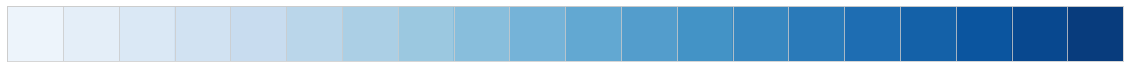

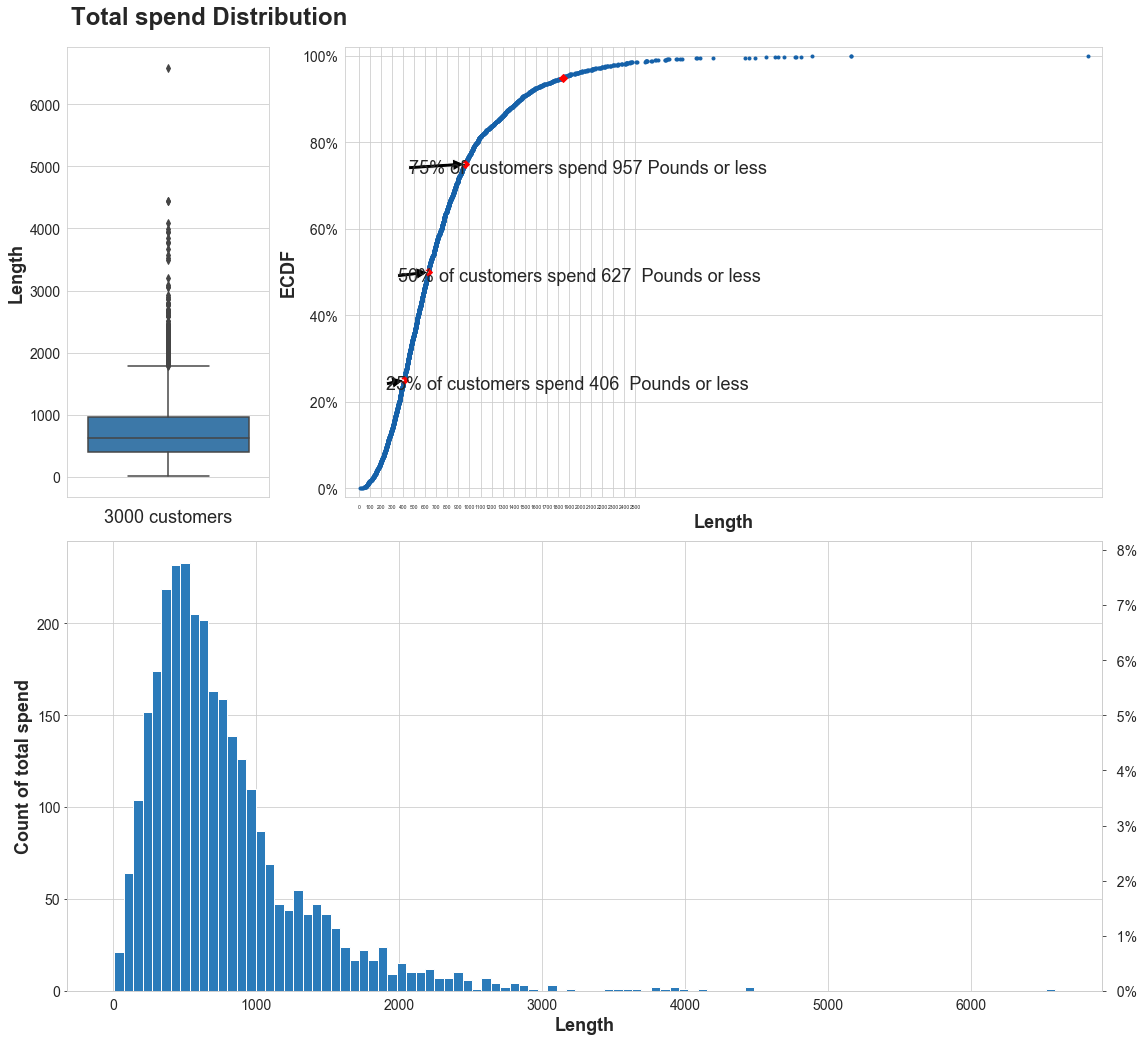

In [114]:
feature_length = data.total_spend

# Plot length distribution

sns.set_style('whitegrid')
sns.palplot(sns.color_palette('Blues', 20))
colors = sns.color_palette('Blues', 20)

fig, ax = plt.subplots(2,4, figsize=(16,14))
fig.suptitle('Total spend Distribution', x=0.065, y=1.03, fontsize=24, fontweight='bold', 
             horizontalalignment='left')
fig.subplots_adjust(top=0.9)

percentiles = np.array([25, 50, 75, 95])
ptiles_gl = np.percentile(feature_length, percentiles)


p1 = plt.subplot2grid((2,4), (0,0), colspan=1)
sns.boxplot(y=feature_length, color=colors[14])

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('3000 customers', fontsize=18)
plt.ylabel('Length', fontsize = 18, fontweight = 'bold')

p2 = plt.subplot2grid((2,4), (0,1), colspan=3)
x = np.sort(feature_length)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x,y, marker='.', linestyle='none', color=colors[16])
plt.plot(ptiles_gl, percentiles/100, marker='D', color='red', linestyle='none')

yvals = p2.get_yticks()
p2.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(np.arange(0, 2600, 100), fontsize=5)
plt.xlabel('Length', fontsize=18, fontweight = 'bold')
plt.ylabel('ECDF', fontsize=18, fontweight='bold')
plt.margins(0.02)

plt.annotate('25% of customers spend 406  Pounds or less', xy=(406, .25), xytext=(250, .23), fontsize=18, 
             arrowprops=dict(facecolor='black'))
plt.annotate('50% of customers spend 627  Pounds or less', xy=(627, .5), xytext=(350, .48), 
             fontsize=18, arrowprops=dict(facecolor='black'))
plt.annotate('75% of customers spend 957 Pounds or less', xy=(957, .75), xytext=(450, .73), fontsize=18, 
             arrowprops=dict(facecolor='black'))



p3 = plt.subplot2grid((2,4), (1,0), colspan=4)
plt.hist(x=feature_length, bins=100, color=colors[14])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel('Length', fontweight = 'bold', fontsize = 18)
plt.ylabel('Count of total spend', fontsize=18, fontweight='bold')

weights = np.ones_like(feature_length) / len(feature_length)
p3 = plt.twinx()
plt.hist(x=feature_length, bins=100, weights= weights, color=colors[14])
yvals = p3.get_yticks()
p3.set_yticklabels(['{:3.0f}%'.format(y*100) for y in yvals])
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
p3.grid(b=False)


plt.tight_layout()
plt.show()

### Cluster1

In [115]:
Cluster1.describe()

,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
count,516.0,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000,5.160000e+02,516.000000,516.000000,516.000000
mean,0.0,6586.912791,543.881783,651.660853,1.198007,765.254438,1.443023,102.835329,85.011822,69.945291,77.876589,79.143295,1.000000e-04,14.553443,45.350874,23.081282,44.511688,70.004148,1.000000e-04,67.797690,18.385815,10.074315,0.050486,1.000000e-04,8.365713,2.398631,3.281462,26.106591,4.736475,18.629854,1.000000e-04,251.184109,5.710834,8.463178
std,0.0,5031.627841,315.993338,387.942278,0.133261,452.760849,0.352122,88.953267,61.349305,63.049981,61.521812,77.901433,8.682034e-19,20.711920,45.252192,28.367817,41.698338,73.265796,8.682034e-19,113.005918,27.213713,14.382262,0.611674,8.682034e-19,12.447255,10.467728,5.872869,20.370790,8.560233,23.161574,8.682034e-19,131.277543,1.933723,16.951118
min,0.0,14.000000,40.000000,52.000000,1.007692,69.470000,0.650000,0.770000,2.190000,0.870000,1.460000,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,1.000000e-04,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,1.000000e-04,29.000000,1.872093,1.000000
25%,0.0,1934.250000,315.500000,366.750000,1.119971,444.927500,1.220000,42.827500,39.725000,28.057500,32.817500,30.155000,1.000000e-04,2.292500,12.930000,5.377500,14.357500,24.005000,1.000000e-04,5.057500,1.160000,1.470000,0.000100,1.000000e-04,1.307500,0.000100,0.000100,12.000000,0.000100,3.000000,1.000000e-04,156.000000,4.266433,1.000000
50%,0.0,7063.500000,471.500000,562.500000,1.170278,662.775000,1.390000,80.200000,70.395000,49.995000,62.430000,51.615000,1.000000e-04,7.405000,32.100000,14.435000,32.000000,49.970000,1.000000e-04,23.335000,7.510000,4.635000,0.000100,1.000000e-04,4.175000,0.000100,0.840000,21.000000,1.000000,10.500000,1.000000e-04,228.000000,5.420204,3.000000
75%,0.0,11153.000000,691.000000,825.750000,1.242251,948.560000,1.610000,124.352500,112.682500,91.760000,106.820000,104.762500,1.000000e-04,18.757500,60.390000,30.890000,62.202500,89.152500,1.000000e-04,79.645000,24.437500,13.452500,0.000100,1.000000e-04,10.150000,0.000100,3.812500,36.000000,6.000000,25.000000,1.000000e-04,320.250000,6.767308,8.000000
max,0.0,16316.000000,2053.000000,2825.000000,2.503686,2871.290000,3.410000,601.910000,332.780000,529.590000,337.830000,538.200000,1.000000e-04,199.020000,270.910000,280.830000,320.590000,674.850000,1.000000e-04,837.260000,187.790000,98.120000,12.000000,1.000000e-04,114.870000,158.440000,47.540000,127.000000,83.000000,164.000000,1.000000e-04,885.000000,14.083333,147.000000


In [116]:
final_assigments.to_csv('final_assigments.csv')

### save files

# 4 RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

* RECENCY (R): Days since last purchase
* FREQUENCY (F): Total number of purchases
* MONETARY VALUE (M): Total money this customer spent.
We will create those 3 customer attributes for each customer

#### Recency
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [117]:
data.head()

,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval
0,4749,220,260,1.181818,631.12,2.87,14.45,35.61,24.01,9.99,32.69,0.0001,20.92,30.57,17.38,10.1900,2.17,1.6800,124.8800,0.0001,0.0001,0.0001,290.0000,0.0001,0.0001,2.2000,30.0,49.0000,13.0000,0.0001,177,1.923913,4.0
1,4757,248,333,1.342742,452.42,1.82,82.21,162.78,46.03,21.16,20.92,0.0001,1.40,40.90,18.95,0.0001,6.07,4.6600,21.8400,14.1900,0.0001,0.0001,0.0001,2.7100,0.0001,0.0001,15.0,7.0000,5.0000,0.0001,112,4.148148,4.0
2,144,226,303,1.340708,261.16,1.16,35.32,36.67,48.90,64.14,7.95,0.0001,4.48,14.31,0.42,2.0900,8.37,0.0001,2.5500,3.8000,21.1800,0.0001,0.0001,1.2700,0.0001,0.0001,22.0,0.0001,0.0001,0.0001,138,6.272727,4.0
3,572,285,346,1.214035,638.79,2.24,39.98,16.83,43.84,13.48,3.63,0.0001,42.75,8.79,10.00,19.8500,20.85,271.8400,0.0001,37.0700,10.9800,19.0000,0.0001,13.9100,5.9200,3.4000,20.0,0.0001,20.0000,0.0001,164,4.100000,2.0
4,669,285,324,1.136842,561.42,1.97,14.69,18.41,6.53,3.47,23.08,0.0001,18.70,9.16,37.35,4.9800,47.19,22.3200,319.5400,0.0001,0.9900,12.5000,0.0001,2.9700,0.0001,1.6600,22.0,7.0000,7.0000,0.0001,182,5.055556,2.0


In [198]:
rfm_df = data[['customer_number','time_interval','baskets','total_spend']]

rfm_df.columns = ["customer_number","Recency","Frequency","Monetary"]
#-- use CustomerID as index

rfm_df.set_index('customer_number',inplace=True)

#-- check the head

rfm_df.head()

,Recency,Frequency,Monetary
customer_number,,,
4749,4.0,220,631.12
4757,4.0,248,452.42
144,4.0,226,261.16
572,2.0,285,638.79
669,2.0,285,561.42


#### Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [199]:
quantiles = rfm_df.quantile(q=[0.2,0.4,0.6,0.8])
quantiles

,Recency,Frequency,Monetary
0.2,1.0,224.0,365.416
0.4,2.0,348.0,534.206
0.6,4.0,487.0,746.958
0.8,8.0,690.2,1068.776


In [200]:
quantiles.to_dict()

{'Recency': {0.2: 1.0, 0.4: 2.0, 0.6: 4.0, 0.8: 8.0},
 'Frequency': {0.2: 224.0, 0.4: 348.0, 0.6: 487.0, 0.8: 690.2000000000003},
 'Monetary': {0.2: 365.41600000000005,
  0.4: 534.206,
  0.6: 746.9579999999999,
  0.8: 1068.7760000000003}}

In [201]:
#--  Creation of RFM Segments

# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x,p,d):
    if x <= d[p][0.2]:
        return 5
    if x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.2]:
        return 1
    if x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else:
        return 5

In [202]:
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [203]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
customer_number,,,,,,
4749,4.0,220,631.12,3,1,3
4757,4.0,248,452.42,3,2,2
144,4.0,226,261.16,3,2,1
572,2.0,285,638.79,4,2,3
669,2.0,285,561.42,4,2,3


Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [204]:
rfm_segmentation['RFMScore'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_number,,,,,,,
4749,4.0,220,631.12,3,1,3,313
4757,4.0,248,452.42,3,2,2,322
144,4.0,226,261.16,3,2,1,321
572,2.0,285,638.79,4,2,3,423
669,2.0,285,561.42,4,2,3,423


Best Recency score = 4: most recently purchase. Best Frequency score = 4: most quantity purchase. Best Monetary score = 4: spent the most.

Let's see who are our Champions (best customers).

In [205]:
rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
customer_number,,,,,,,
946,2.0,634,1055.42,4,4,4,444
10880,2.0,551,1050.00,4,4,4,444
8226,2.0,502,1038.32,4,4,4,444
4440,2.0,586,1033.31,4,4,4,444
5920,2.0,514,1029.90,4,4,4,444
4384,2.0,488,1026.44,4,4,4,444
9011,2.0,654,1023.32,4,4,4,444
2777,2.0,497,1013.56,4,4,4,444
13131,2.0,636,1011.82,4,4,4,444


How many customers do we have in each segment?

In [245]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFMScore']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFMScore']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFMScore']=='111']))

Best Customers:  53
Loyal Customers:  597
Big Spenders:  600
Almost Lost:  35
Lost Customers:  28
Lost Cheap Customers:  236


In [207]:
df_rfm = pd.DataFrame(rfm_segmentation[rfm_segmentation['RFMScore']=='444'].sort_values('Monetary', ascending=False).head(10))

df_rfm = df_rfm.reset_index('customer_number')
df_rfm.columns

Index(['customer_number', 'Recency', 'Frequency', 'Monetary', 'R_Quartile',
       'F_Quartile', 'M_Quartile', 'RFMScore'],
      dtype='object')

In [208]:
import re
def rfmseg(RFMScore):

    if RFMScore=="444":
          return "Best Customers"
        

    elif RFMScore=='244':
        return "Almost Lost"
          
    elif RFMScore=='144':
        return "Lost Customers"

    elif RFMScore=='111':
        return 'Lost Cheap Customers'
    
    elif re.match(".4.",RFMScore):
        return "Loyal Customers"
      
    elif re.match("..4",RFMScore):
        return "Big Spenders"
    else:
        return None


rfm_segmentation['RFMSeg'] = None
for index, row in rfm_segmentation.iterrows():
    rfm_segmentation.ix[index,'RFMSeg'] = rfmseg(row["RFMScore"])



C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Carl\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
C:\Users\Carl\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [211]:
rfm_segmentation = rfm_segmentation.reset_index('customer_number')

In [213]:
df_plot = pd.merge(final_assigments,rfm_segmentation)
df_plot.head()

,Cluster,customer_number,baskets,total_quantity,average_quantity,total_spend,average_spend,fruit_veg,dairy,confectionary,grocery_food,grocery_health_pets,bakery,newspapers_magazines,prepared_meals,soft_drinks,frozen,meat,tobacco,drinks,deli,world_foods,lottery,cashpoint,seasonal_gifting,discount_bakery,practical_items,afternoon,evening,morning,night,total_category,average_category,time_interval,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,RFMSeg
0,1,4749,220,260,1.181818,631.12,2.87,14.45,35.61,24.01,9.99,32.69,0.0001,20.92,30.57,17.38,10.1900,2.17,1.6800,124.8800,0.0001,0.0001,0.0001,290.0000,0.0001,0.0001,2.2000,30.0,49.0000,13.0000,0.0001,177,1.923913,4.0,4.0,220,631.12,3,1,3,313,None
1,4,4757,248,333,1.342742,452.42,1.82,82.21,162.78,46.03,21.16,20.92,0.0001,1.40,40.90,18.95,0.0001,6.07,4.6600,21.8400,14.1900,0.0001,0.0001,0.0001,2.7100,0.0001,0.0001,15.0,7.0000,5.0000,0.0001,112,4.148148,4.0,4.0,248,452.42,3,2,2,322,None
2,0,144,226,303,1.340708,261.16,1.16,35.32,36.67,48.90,64.14,7.95,0.0001,4.48,14.31,0.42,2.0900,8.37,0.0001,2.5500,3.8000,21.1800,0.0001,0.0001,1.2700,0.0001,0.0001,22.0,0.0001,0.0001,0.0001,138,6.272727,4.0,4.0,226,261.16,3,2,1,321,None
3,3,572,285,346,1.214035,638.79,2.24,39.98,16.83,43.84,13.48,3.63,0.0001,42.75,8.79,10.00,19.8500,20.85,271.8400,0.0001,37.0700,10.9800,19.0000,0.0001,13.9100,5.9200,3.4000,20.0,0.0001,20.0000,0.0001,164,4.100000,2.0,2.0,285,638.79,4,2,3,423,None
4,3,669,285,324,1.136842,561.42,1.97,14.69,18.41,6.53,3.47,23.08,0.0001,18.70,9.16,37.35,4.9800,47.19,22.3200,319.5400,0.0001,0.9900,12.5000,0.0001,2.9700,0.0001,1.6600,22.0,7.0000,7.0000,0.0001,182,5.055556,2.0,2.0,285,561.42,4,2,3,423,None


In [244]:
df_plot.Cluster +=1
x = pd.DataFrame(df_plot[["Cluster","RFMSeg"]].groupby(["Cluster","RFMSeg"]).size())

x

0
Cluster RFMSeg                   
1       Almost Lost            12
        Best Customers         10
        Big Spenders           61
        Lost Cheap Customers   32
        Lost Customers         11
        Loyal Customers        86
2       Almost Lost             2
        Best Customers          4
        Big Spenders           69
        Lost Cheap Customers   22
        Lost Customers          4
        Loyal Customers        82
3       Almost Lost             2
        Best Customers          1
        Big Spenders           17
        Lost Cheap Customers   78
        Lost Customers          2
        Loyal Customers        36
4       Almost Lost            10
        Best Customers         18
        Big Spenders           75
        Lost Cheap Customers    7
        Lost Customers          9
        Loyal Customers       118
5       Almost Lost             3
        Best Customers         12
        Big Spenders           55
        Lost Cheap Customers   56
        Lost Customers          1
        Loyal Customers        79
6       Best Customers          3
        Big Spenders           21
        Lost Cheap Customers   41
        Loyal Customers        21
7       Almost Lost             6
        Best Customers          5
        Big Spenders           28
        Lost Customers          1
        Loyal Customers        59

In [127]:
"""

from wordcloud import WordCloud


wc = WordCloud(background_color="white", width=1200, height=600).fit_words(tk_value)

plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()



"""

'\n\nfrom wordcloud import WordCloud\n\n\nwc = WordCloud(background_color="white", width=1200, height=600).fit_words(tk_value)\n\nplt.figure(figsize=(20, 10))\nplt.axis("off")\nplt.imshow(wc, interpolation="bilinear")\nplt.show()\n\n\n\n'

In [248]:
df_plot.to_csv('df_plot.csv')